# Métodos de Suavización Exponencial

- El presente capítulo trata del ***suavizado de datos en la señal de series temporales***. El capítulo está organizado como sigue:

    - ***Introducción al suavizado de series temporales***

    - ***Suavizado exponencial de primer orden***

    - ***Suavizado exponencial de segundo orden***

    - ***Suavizado exponencial de orden superior***
    

# Análisis

## Introducción al suavizado de series temporales

- Los datos de las series temporales se componen de ***señal y ruido***, donde la ***señal captura la dinámica intrínseca del proceso***; sin embargo, el ***ruido representa el componente no modelado de la señal o error aleatorio no correlacionado, el cual en diferentes tiempos es estadísticamente independiente***. 

- La dinámica intrínseca de una señal de serie temporal puede ser tan simple como ***la media del proceso*** o puede ser una ***forma funcional compleja*** dentro de las observaciones, como se representa aquí:

    $$
    \\[1mm]
    y_{t}=f(t, \boldsymbol{\beta})+\varepsilon_{t},\quad\text{para}\quad i=1,2,3,\dots,T,
$$
    
    donde $y_{t}$ representa las observaciones, $\boldsymbol{\beta}$ es un vector de parámetros desconocidos, y $\varepsilon_{t}$ es el ***error aleatorio no correlacionado***, usualmente con media 0 y desviación 1.

````{figure} ./figures/signal_noise.png
:align: center
:name: signal_noise_fig
:scale: 80

````

- $f(t, \boldsymbol{\beta})$ ***denota la forma funcional de la señal***. Un ejemplo puede ser una constante (***media***) como forma funcional:

$$
    y_{t}=\mu+\varepsilon_{t}
$$

- Dado que $\varepsilon_{t}$ es ***ruido blanco***, este enfoque basado en el suavizado ayuda a ***separar la forma funcional intrínseca del ruido aleatorio, cancelándolo***. 

- Los métodos predictivos de suavización pueden considerarse como ***filtros*** que toman datos de entrada y ***separan los componentes de tendencia y de ruido***, como se muestra en la {numref}`fig1_chapter2`

```{figure} ./figures/fig1_chapter2.png
:name: fig1_chapter2
:align: center

Separación de componentes de tendencia y ruido.
```

- Un ***proceso constante*** puede ser suavizado reemplazando la observación actual con el mejor estimador para $\mu$. Usando el criterio de ***mínimos cuadrados***, definimos la ***suma de cuadrados de los errores*** $SS_{E}$, para el proceso constante como 

$$
SS_{E}=\sum_{t=1}^{T}(y_{t}-\mu)^{2}.
$$

- La estimación por mínimos cuadrados de $\mu$ puede ser calculada derivando $SS_{E}$ con respecto a $\mu$ el igualar a cero (***verifíquelo***). Esto entrega

  $$
  \hat{\mu}=\frac{1}{T}\sum_{t=1}^{T}y_{t},
  $$(constant_process_ols)

  donde $\hat{\mu}$ es la estimación por mínimos cuadrados de $\mu$.

- La Ecuación {eq}`constant_process_ols` muestra que la estimación por mínimos cuadrado de $\mu$, es en efecto, el promedio de las observaciones hasta el tiempo $T$.

````{admonition} Observación
- El principal problema con el suavizador de la Ecuación {eq}`constant_process_ols` es que ***reacciona lentamente a procesos de cambios***, debido a que ***acumula mas y mas puntos de datos ganando algún tipo de inercia***. La solución mas obvia es de alguna forma descontar datos mas antiguos. 
- Una solución común es usar la ***media móvil simple*** definida por

$$
M_{T}= \frac{y_{T}+y_{T-1}+\cdots+y_{T-N+1}}{N}=\frac{1}{N}\sum_{t=T-N+1}^{N}y_{t}.
$$(simple_moving_avg)

- Una media reaccionará mas rápido a cambios si $N$ es pequeño. Dado que para observaciones no correlacionadas con varianza constante $\sigma^{2}$ se tiene que (***verifíquelo***)

    $$
    \text{Var}(M_{T})=\frac{\sigma^{2}}{N}.
    $$(variance_sma)

- Dada la Ecuación {eq}`variance_sma`. Si se espera que el proceso es constante, un valor grande de $N$ puede ser usado, mientras que, un valor pequeño de $N$ es preferido si el proceso es cambiante.    
- Queda como ejercicio para el lector verificar que la ***función de autocorrelación (ACF)*** de la media móvil con $k$-lags está dada por

$$
\rho_{k}=
\begin{cases}
\displaystyle{1-\frac{|k|}{N}}, & k<N\\
0, & k\geq N
\end{cases}.
$$(acf_moving_average)
````

## Suavización exponencial de primer orden

````{prf:theorem} Suavización exponencial simple
:label: th-simple_exp_smoothing

Dada una serie de tiempo $(y_{t})_{t=1}^{T}$. Una ***suavización exponencial ponderada*** está definida por:

$$
\sum_{t=1}^{T-1}\theta^{t}y_{T-t}=y_{T}+\theta y_{T-1}+\theta^{2}y_{t-2}+\cdots+\theta^{T-1}y_{1}
$$ (eq:simple_exp_smoothing)

donde $\theta$ satisface $|\theta|<1$. Esto es, observaciones pasadas son descontadas de manera geométricamente descendiente. Entonces, la ***suavización exponencial simple*** está representada por:

$$
\tilde{y}_{T}=\lambda y_{T}+(1-\lambda)\tilde{y}_{T-1},\quad\text{donde}\quad\lambda=1-\theta.
$$

$\lambda$ es conocido como el ***factor de descuento***. Nótese que el factor de descuento $\lambda$, representa el peso colocado sobre la última observación $y_{T}$ y $1-\lambda$ el peso asignado al valor suavizado de la previa observación $\tilde{y}_{T-1}$.
````

**`Demostración`**

- Por hipótesis, pasadas observaciones son descontadas en forma geométricamente descendente, con $|\theta|<1$. Nótese que el suavizador {eq}`eq:simple_exp_smoothing` no es una media movil simple. En efecto:

$$
\begin{align*}
\sum_{t=0}^{T-1}\theta^{t}&=1+\theta+\theta^2+\cdots+\theta^{T-1},\quad\text{multiplicando por}~(1-\theta)\\
(1-\theta)\sum_{t=0}^{T-1}\theta^{t}&=(1-\theta)(1+\theta+\theta^2+\cdots+\theta^{T-1})\\
&=(1+\theta+\theta^2+\cdots+\theta^{T-1})-(\theta+\theta^2+\theta^{3}+\cdots+\theta^{T-1}+\theta^{T})\\
&=1-\theta^{T}\Longrightarrow\\
\sum_{t=0}^{T-1}\theta^{t}&=\frac{1-\theta^{T}}{1-\theta}.
\end{align*}
$$

- Nótese que la sumatoria:
    
    $$
    \sum_{t=0}^{T-1}\theta^{t}=\frac{1-\theta^{T}}{1-\theta},
    $$

    no necesariamente es igual a 1. Esto puede ser ajustado multiplicando por $(1-\theta)/(1-\theta^{T})$ la ecuación {eq}`eq:simple_exp_smoothing`.

- Además, dado que $(1-\theta)/(1-\theta^{T})\rightarrow 1-\theta$ cuando $T\rightarrow\infty,~ |\theta|<1$. Entonces {eq}`eq:simple_exp_smoothing` puede reescribirse como:

$$
\begin{align*}
\tilde{y}_{T}&=\frac{1-\theta}{1-\theta^{T}}\sum_{t=0}^{T-1}\theta^{t}y_{T-t}\overset{T\rightarrow\infty}{=}(1-\theta)\sum_{t=0}^{T-1}\theta^{t}y_{T-t}\\
&=(1-\theta)(y_{T}+\theta y_{T-1}+\theta^{2}y_{T-2}+\cdots+\theta^{T-1}y_{1})
\end{align*}
$$

- Entonces la ***suavización exponencial simple*** está dada por

$$
\tilde{y}_{T}=(1-\theta)(y_{T}+\theta y_{T-1}+\theta^{2}y_{T-2}+\cdots+\theta^{T-1}y_{1})
$$ (eq:simple_exp_smoothing2)

- Una expresión alternativa para la suavización exponencial simple es:

$$
\begin{align*}
\tilde{y}_{T}&=(1-\theta)(y_{T}+\theta y_{T-1}+\theta^{2}y_{T-2}+\cdots+\theta^{T-1}y_{1}\\
&=(1-\theta)y_{T}+(1-\theta)(\theta y_{T-1}+\theta^{2}y_{T-2}+\cdots+\theta^{T-1}y_{1})\\
&=(1-\theta)y_{T}+\theta(1-\theta)(y_{T-1}+\theta y_{T-2}+\cdots+\theta^{T-2}y_{1})\\
&=(1-\theta)y_{T}+\theta\tilde{y}_{T-1}.
\end{align*}
$$

- Esto es, la suavización exponencial de primer orden, puede verse como combianción lineal de la observación actual y la observación suavizada en un tiempo previo. Definiendo $\lambda=1-\theta$, (***factor de corrección***) se tiene que:

$$
\tilde{y}_{T}=\lambda y_{T}+(1-\lambda)\tilde{y}_{T-1}.
$$ (eq:simple_exp_smoothing3)

```{admonition} Observación
:class: tip

Análogamente a la longitud del periodo en la media movil, ***un asunto importante para la suavización exponencial es la selección del factor de descuento*** $\lambda$. Además, a partir de la ecuación {eq}`eq:simple_exp_smoothing3` podemos observa que el cálculo de $\tilde{y}_{1}$ va a requerir conocer $\tilde{y}_{0}$.
```

````{prf:theorem} Selección de $\tilde{y}_{0}$
:label: th-initial-value-simple-exp-smoothing

Dada una serie de tiempo $(y_{t})_{t=1}^{T}$, donde $T$ es grande, la contribución de $\tilde{y}_{0}$ a $\tilde{y}_{T}$ es mínima. Por lo tanto, ***la estimación de*** $\tilde{y}_{0}$ ***tiene poca influencia sobre la suavización***. Sin embargo, dos estimaciones de $\tilde{y}_{0}$ comunmente usadas en las aplicaciones son las siguientes:

1. $\tilde{y}_{0}=y_{1}$: Si los cambios esperados del proceso ocurren temprano y rápido, esta selección para el valor inicial de $\tilde{y}_{T}$ es razonable.
2. $\tilde{y}_{0}=\overline{y}$: Tomar el promedio de los datos disponibles. Si el proceso es constante, al menos al inicio, este sería el valor mas adecuado.
````

**`Demostración`**

- Dado que $\tilde{y}_{0}$ es necesario en el calculo recursivo que inicia con: $\tilde{y}_{1}=\lambda y_{1}+(1-\lambda)\tilde{y}_{0}$, estimamos su valor a partir de la Ecuación {eq}`eq:simple_exp_smoothing3`

$$
\begin{align*}
\tilde{y}_{1}&=\lambda y_{1}+(1-\lambda)\tilde{y}_{0}\\
\tilde{y}_{2}&=\lambda y_{2}+(1-\lambda)\tilde{y}_{1}=\lambda y_{2}+(1-\lambda)(\lambda y_{1}+(1-\lambda)\tilde{y}_{0})=\lambda(y_{2}+(1-\lambda)y_{1})+(1-\lambda)^{2}\tilde{y}_{0}\\
\tilde{y}_{3}&=\lambda y_{3}+(1-\lambda)\tilde{y}_{2}=\lambda y_{3}+(1-\lambda)(\lambda(y_{2}+(1-\lambda)\tilde{y}_{1})+(1-\lambda)^{2}\tilde{y}_{0})\\
&=\lambda(y_{3}+(1-\lambda)y_{2}+(1-\lambda)^{2}y_{1})+(1-\lambda)^{3}\tilde{y}_{0}\\
&\vdots\\
\tilde{y}_{T}&=\lambda(y_{T}+(1-\lambda)y_{T-1}+(1-\lambda)^{2}y_{T-2}+\cdots+(1-\lambda)^{T-1}y_{1})+(1-\lambda)^{T}\tilde{y}_{0}
\end{align*}
$$

- Por lo tanto, cuando $T\rightarrow\infty,~ (1-\lambda)^{T}\rightarrow 0$, esto es, la contribución de $\tilde{y}_{0}$ a $\tilde{y}_{T}$ es mínima. Esto es, la estimación de $\tilde{y}_{0}$ no es relevante para un conjunto grande de datos.

## El valor de $\lambda$

``````{admonition} Observación
- En general, cuando $\lambda$ tiende a 1, y se hace más hincapié en la última observación, los ***valores suavizados se aproximarán a las observaciones originales***. 
- Si $\lambda=0$, los valores suavizados serán todos igual a una constante, a saber $\tilde{y}_{0}$. Esta línea constante sería la ***versión más suavizada*** de cualquier patrón que siga la serie de tiempo original.
- Para $\lambda=1$, tenemos $\tilde{y}_{T}=y_{T}$ y este representará la ***versión menos suavizada*** de la serie de tiempo original.
- Con base en la selección de $\lambda$, esperamos acordemente que la varianza varíe entre 0 y la varianza de la serie de tiempo original. 
``````

- Nótese que bajo el supuesto de independencia y varianza constante tenemos que

$$
\begin{align}
\text{Var}(\tilde{y}_{T}) &= \text{Var}\left(\lambda\sum_{t=0}^{\infty}(1-\lambda)^{t}y_{T-t}\right)\\
&= \lambda^{2}\sum_{t=0}^{\infty}(1-\lambda)^{2t}\text{Var}(y_{T-t})\\
&= \lambda^{2}\sum_{t=0}^{\infty}(1-\lambda)^{2t}\text{Var}(y_{T})\\
&= \text{Var}(y_{T})\lambda^{2}\sum_{t=0}^{\infty}(1-\lambda)^{2t}
\end{align}
$$

- Observe que

$$
\sum_{t=0}^{T-1}(1-\lambda)^{2t}=1+(1-\lambda)^{2}+(1-\lambda)^{4}+\cdots+(1-\lambda)^{2(T-1)}
$$

- Multiplicando por $1-(1-\lambda)^{2}$ se tiene que:

$$
\begin{align*}
(1-(1-\lambda)^{2})\sum_{t=0}^{T-1}(1-\lambda)^{2t} &= 1+(1-\lambda)^{2}+(1-\lambda)^{4}+\cdots+(1-\lambda)^{2(T-1)}\\
&- ((1-\lambda)^{2}+(1-\lambda)^{4}+\cdots+(1-\lambda)^{2T}\\[3mm]
&= 1-(1-\lambda)^{2T}\xrightarrow[T\rightarrow\infty]{}1,\quad |1-\lambda|<1\Rightarrow\\
\sum_{t=0}^{T-1}(1-\lambda)^{2t} &= \frac{1}{\lambda(2-\lambda)}
\end{align*}
$$

- Por lo tanto,

$$
\begin{align}
\text{Var}(\tilde{y}_{T}) = \text{Var}(y_{T})\lambda^{2}\sum_{t=0}^{\infty}(1-\lambda)^{2t} = \text{Var}(y_{T})\lambda^{2}\frac{1}{\lambda(2-\lambda)} = \frac{\lambda}{2-\lambda}\text{Var}(y_{T})
\end{align}
$$

- Nótese que si $\lambda\rightarrow1$, $\text{Var}(\tilde{y}_{T})\rightarrow\text{Var}(y_{T})$, y si $\lambda\rightarrow0$, $\text{Var}(\tilde{y}_{T}\rightarrow0)$. La pregunta ahora es, ¿cuánto suavizado se necesita?. En la literatura se recomienda $\lambda$ entre 0.1 y 0.4 y, de hecho, funcionan bien en la práctica. Un método más riguroso para encontrar el valor $\lambda$ se discutirá mas adelante en este capítulo.

- Como medidas de precisión usaremos las siguientes métricas que vienen ya implementadas en `Python`; `MAPE, MAD` y `MSD`. 

- El ***error porcentual medio absoluto (MAPE)*** es el cambio porcentual medio absoluto entre el valor predicho, esto es $\tilde{y}_{t-1}:=\tilde{y}_{t}(t-1)$, para una predicción ***one-step-ahead*** y el valor real dado por

$$
\text{MAPE}=\frac{\displaystyle{\sum_{t=1}^{T}|(y_{t}-\tilde{y}_{t-1})/y_{t}|}}{T}\times 100,\quad (y_{t}\neq 0).
$$

- La ***desviación media absoluta (MAD)*** es la diferencia absoluta media entre los valores predichos y los verdaderos, dada por

$$
\text{MAD}=\frac{\displaystyle{\sum_{t=1}^{T}|(y_{t}-\tilde{y}_{t-1})|}}{T}.
$$

- La ***desviación cuadrática media (MSD)*** es la diferencia cuadrática media entre los valores predichos y los verdaderos, dada por

$$
\text{MSD}=\frac{\displaystyle{\sum_{t=1}^{T}(y_{t}-\tilde{y}_{t-1})^{2}}}{T}.
$$

## Modelado de datos de series temporales

````{prf:theorem}

- Considere un ***proceso constante***, esto es, un proceso donde los datos de series de tiempo se espera que varíen en torno a un nivel constante, con fluctuaciones aleatorias, las cuales son caracterizadas usualmente por ***errores no correlacionados con media 0 y varianza constante***. 

- La clase general de modelos puede expresarse como

    $$
    y_{t}=f(t, \boldsymbol{\beta})+\varepsilon_{t},
    $$

    donde $\boldsymbol{\beta}$ es un vector de parámetros desconocidos y $\varepsilon_{t}$ representa errores no correlacionados. 

- El ***proceso constante*** es miembro de esta clase general:

    $$
    y_{t}=\beta_{0}+\varepsilon_{t},
    $$

    donde $\beta_{0}$ es igual a $\mu$.

- Entonces, la ***estimación de mínimos cuadrados ponderada*** de $\beta_{0}$ en el proceso constante, con ***pesos exponencialmente decrecientes en el tiempo*** es

$$
\hat{\beta}_{0}=(1-\theta)\sum_{t=0}^{T-1}\theta^{t}y_{T-t}.
$$
````

**`Demostración`**

- Consideremos la ***suma de errores cuadráticos*** para el proceso constante, dada por

$$
SS_{E}=\sum_{t=1}^{T}(y_{t}-\mu)^{2}
$$

- Si afirmamos que no todas las observaciones deberían tener igual influencia sobre la suma, introducimos una cadena de ***pesos geométricamente decrecientes en tiempo***

$$
SS_{E}^{\star}=\sum_{t=0}^{T-1}\theta^{t}(y_{T-t}-\beta_{0})^{2},~\text{donde}~|\theta|<1.
$$(error_sq_sum1)

- Derivando {eq}`error_sq_sum1` con respecto a $\beta_{0}$ e igualando a cero obtenemos el estimador por mínimos cuadrado para $\beta_{0}$

$$
\begin{align*}
\frac{\partial SS_{E}^{\star}}{\partial\beta_{0}} &= \frac{\partial}{\partial\beta_{0}}\left(\sum_{t=0}^{T-1}\theta^{t}(y_{T-t}-\hat{\beta}_{0})\right)=-2\sum_{t=0}^{T-1}\theta^{t}(y_{T-t}-\hat{\beta}_{0})=0
\end{align*}
$$

- Dado que $\sum_{t=0}^{T-1}\theta^{t}=(1-\theta^{T})/(1-\theta)$, entonces

$$
\hat{\beta}_{0}=\frac{1-\theta}{1-\theta^{T}}\sum_{t=0}^{T-1}\theta^{t}y_{T-t}\xrightarrow[T\rightarrow\infty]{}(1-\theta)\sum_{t=0}^{T-1}\theta^{t}y_{T-t}.
$$

- Nótese que $\hat{\beta}_{0}=\tilde{y}_{T}$. Esto es, el proceso de suavización exponencial simple en efecto provee una ***estimación de mínimos cuadrados ponderada*** de $\beta_{0}$, para el proceso constante con pesos que son exponencialmente decrecientes en el tiempo.

``````{admonition} Observación
- Retomando con nuestra clase de modelo general $y_{t}=f(t; \boldsymbol{\beta})+\varepsilon_{t},~f(t, \boldsymbol{\beta})$ puede ser cualquier función de $t$.
- Por ejemplo, para ***series de tiempo no estacionarias***, es mas conveniente considerar una ***familia polinómica***, donde el proceso constante es el modelos mas simple que podemos considerar.
``````

``````{prf:theorem}
- Un modelo apropiado en tiempo para tendencias lineales está dado por:

    $$
    y_{t}=\beta_{0}+\beta_{1}t+\varepsilon_{t},
    $$

    donde $\varepsilon_{t}$ es no correlacionado con media 0 y varianza constante $\sigma_{\varepsilon}^{2}$.

- Además, el suavizador exponencial simple es un estimador sesgado para el ***modelo de tendencia lineal*** y la cantidad de sesgo es: $-(1-\lambda)\beta_{1}/\lambda$, donde

$$
\text{E}(\tilde{y}_{T})=\beta_{0}+\beta_{1}T-\frac{1-\lambda}{\lambda}\beta_{1}=\text{E}(y_{T})-\frac{1-\lambda}{\lambda}\beta_{1}.
$$

- Dada la ***suavización exponencial de segundo orden*** definida por:

    $$
    \tilde{y}_{T}^{(2)}=\lambda\tilde{y}_{T}^{(1)}+(1-\lambda)\tilde{y}_{T-1}^{(2)},
    $$

    donde $\tilde{y}_{T}^{(1)}, \tilde{y}_{T}^{(2)}$ denotan las suavizaciones exponenciales de primer y segundo orden respectivamente. Entonces el predictor de $\tilde{y}_{T}$ está dado por

    $$
    \tilde{y}_{T}=2\tilde{y}_{T}^{(1)}-\tilde{y}_{T}^{(2)}.
    $$ 

- Pude demostrarse que $\tilde{y}_{T}$ es insesgado.
``````

**`Demostración`**

- Bajo el supuesto de independencia sobre $(y_{t})_{t=1}^{\infty}$, calculamos suavización exponencial para datos de series de tiempo que exhiben tendencia lineal

$$
\text{E}(\tilde{y}_{T})=\text{E}\left(\lambda\sum_{t=0}^{T-1}(1-\lambda)^{t}y_{T-t}\right)=\lambda\sum_{t=0}^{T-1}(1-\lambda)^{t}\text{E}(y_{T-t}).
$$

- Dado que para la tendencia lineal: $\text{E}(y_{t})=E(\beta_{0})+\beta_{1}t+\varepsilon_{t})=\beta_{0}+\beta_{1}t$, entonces

$$
\begin{align*}
\text{E}(\tilde{y}_{T}) &= \lambda\sum_{t=0}^{T-1}(1-\lambda)^{t}(\beta_{0}+\beta_{1}(T-t))\\
&= \lambda\sum_{t=0}^{T-1}(1-\lambda)^{t}(\beta_{0}+\beta_{1}t)-\lambda\sum_{t=0}^{T-1}(1-\lambda)^{t}(\beta_{1}t)\\
&= (\beta_{0}+\beta_{1}T)\lambda\sum_{t=0}^{T-1}(1-\lambda)^{t}-\lambda\beta_{1}\sum_{t=0}^{T-1}(1-\lambda)^{t}t.
\end{align*}
$$

- Dado que $|1-\lambda|<1$ se tiene que $\sum_{t=0}^{T-1}(1-\lambda)^{t}=1/(1-(1-\lambda))=1/\lambda$. Nótese además que

$$
\begin{align*}
\sum_{t=0}^{\infty}(1-\lambda)^{t}t&=(1-\lambda)\sum_{t=0}^{\infty}t(1-\lambda)^{t-1}\\
&= -(1-\lambda)\sum_{t=0}^{\infty}\frac{\partial}{\partial\lambda}(1-\lambda)^{t}\\
&= -(1-\lambda)\frac{\partial}{\partial\lambda}\left(\sum_{t=0}^{\infty}(1-\lambda)^{t}\right)\\
&= -(1-\lambda)\frac{\partial}{\partial\lambda}\left(\frac{1}{1-(1-\lambda)}\right)\\
&= -(1-\lambda)\frac{\partial}{\partial\lambda}\left(\frac{1}{\lambda}\right)=-(1-\lambda)\left(-\frac{1}{\lambda^{2}}\right)=\frac{1-\lambda}{\lambda^{2}}.
\end{align*}
$$

- Entonces 

$$
\text{E}(\tilde{y}_{T})=(\beta_{0}+\beta_{1}T)\lambda\left(\frac{1}{\lambda}\right)-\lambda\beta_{1}\left(\frac{1-\lambda}{\lambda^{2}}\right)=(\beta_{0}+\beta_{1}T)-\frac{1-\lambda}{\lambda}\beta_{1}=\text{E}(y_{T})-\frac{1-\lambda}{\lambda}\beta_{1}.
$$

- Esto es, la suavización exponencial simple es ***sesgada como estimador*** y la cantidad de sesgo está dada por $-(1-\lambda)\beta_{1}/\lambda$, la cual puede generar errores de subestimación. 
- Una solución puede ser usar $\lambda$ grande ya que $(1-\lambda)/\lambda\rightarrow0$ cuando $\lambda\rightarrow1$. Técnicas autoadaptativas para $\lambda$ pueden ser estudiadas, las cuales sigan los cambios en el proceso.

- Dado que la suavización de segundo orden está dada por

    $$
    \tilde{y}_{T}^{(2)}=\lambda\tilde{y}_{T}^{(1)}+(1-\lambda)y_{T-1}^{(2)},
    $$

    esto es, $\tilde{y}_{T}^{(2)}$ es obtenida aplicando suavización exponencial simple a $\tilde{y}_{T}$.

- Por motivos de derivación de la expresión, consideramos el mismo $\lambda$ para $\tilde{y}_{T}^{(1)}$ y $\tilde{y}_{t}^{(2)}$. Dado que la suavización exponencial de primer orden es sesgada, su suavización (***suavización de segundo orden***) también es sesgada. Entonces

$$
\text{E}(\tilde{y}_{T}^{(2)})=\text{E}(\tilde{y}_{T}^{(1)})-\frac{1-\lambda}{\lambda}\beta_{1}. 
$$

- Además

$$
\frac{1-\lambda}{\lambda}\beta_{1}=\text{E}(\tilde{y}_{T}^{(1)})-E(\tilde{y}_{T}^{(2)})\Rightarrow\tilde{y}_{T}^{(1)}-\tilde{y}_{T}^{(2)}=\frac{1-\lambda}{\lambda}\beta_{1},~\text{entonces}
$$

$$
\textcolor{red}{\hat{\beta}_{1, T}=\frac{\lambda}{1-\lambda}(\tilde{y}_{T}^{(1)}-\tilde{y}_{T}^{(2)})}.
$$(beta1_estimation_eq)

- Usando la Ecuación {eq}`beta1_estimation_eq` tenemos que: $\text{E}(\tilde{y}_{T}^{(1)})=(\hat{\beta}_{0, T}+\hat{\beta}_{1, T}T)-(1-\lambda)\hat{\beta}_{1, T}/\lambda$, entonces, análogamente

$$
\textcolor{red}{\hat{\beta}_{0, T}=\tilde{y}_{T}^{(1)}-T\hat{\beta}_{1, T}+\displaystyle{\frac{1-\lambda}{\lambda}}\hat{\beta}_{1, T}.}
$$(beta0_estimation_eq)

- Reescribiendo $\hat{\beta}_{0, T}$ en términos de $\tilde{y}_{T}^{(1)}$ y $\tilde{y}_{T}^{(2)}$ obtenemos

$$
\begin{align*}
\hat{\beta}_{0, T} &= \tilde{y}_{T}^{(1)}-T\left(\frac{\lambda}{1-\lambda}(\tilde{y}_{T}^{(1)}-\tilde{y}_{T}^{(2)})\right)+\frac{1-\lambda}{\lambda}\left(\frac{\lambda}{1-\lambda}(\tilde{y}_{T}^{(1)}-\tilde{y}_{T}^{(2)})\right)\\
&= \tilde{y}_{T}^{(1)}-T\frac{\lambda}{1-\lambda}(\tilde{y}_{T}^{(1)}-\tilde{y}_{T}^{(2)})+(\tilde{y}_{T}^{(1)}-\tilde{y}_{T}^{(2)})\\
&= \left(2-T\frac{\lambda}{1-\lambda}\right)\tilde{y}_{T}^{(1)}-\left(1-T\frac{\lambda}{1-\lambda}\right)y_{T}^{(2)},
\end{align*}
$$

- Entonces

$$
\textcolor{red}{\hat{\beta}_{0, T} = \left(2-T\frac{\lambda}{1-\lambda}\right)\tilde{y}_{T}^{(1)}-\left(1-T\frac{\lambda}{1-\lambda}\right)y_{T}^{(2)}},
$$(beta0_estimation_eq_yhat)

- Combinando las Ecuaciones {eq}`beta1_estimation_eq`, {eq}`beta0_estimation_eq_yhat` tenemos que

$$
\begin{align*}
\tilde{y}_{T} &= \hat{\beta}_{0, T}+\hat{\beta}_{1, T}T=\left(2-T\frac{\lambda}{1-\lambda}\right)\tilde{y}_{T}^{(1)}-\left(1-T\frac{\lambda}{1-\lambda}\right)\tilde{y}_{T}^{(2)}+\frac{\lambda}{1-\lambda}(\tilde{y}_{T}^{(1)}-\tilde{y}_{T}^{(2)})T\\
&= \left(2-T\frac{\lambda}{1-\lambda}+T\frac{\lambda}{1-\lambda}\right)\tilde{y}_{T}^{(1)}-\left(1-T\frac{\lambda}{1-\lambda}+T\frac{\lambda}{1-\lambda}\right)\tilde{y}_{T}^{(2)}\\[2mm]
&=2\tilde{y}_{T}^{(1)}-\tilde{y}_{T}^{(2)}.
\end{align*}
$$

- Entonces

$$
\textcolor{red}{\tilde{y}_{T}=2\tilde{y}_{T}^{(1)}-\tilde{y}_{T}^{(2)}}
$$(first_exp_smooth)

- Nótese que como

$$
\text{E}(\tilde{y}_{T}^{(1)}) = (\beta_{0}+\beta_{1}T)-\frac{1-\lambda}{\lambda}\beta_{1}\Rightarrow\tilde{y}_{T}^{(1)}=(\hat{\beta}_{0, T}+\hat{\beta}_{1, T}T)-\frac{1-\lambda}{\lambda}\hat{\beta}_{1, T}
$$

- Además

$$
\begin{align*}
\text{E}(\tilde{y}_{T}^{(2)}) &= \text{E}(\tilde{y}_{T}^{(1)})-\frac{1-\lambda}{\lambda}\hat{\beta}_{1, T}=\text{E}\left((\hat{\beta}_{0, T}+\hat{\beta}_{1, T}T)-\frac{1-\lambda}{\lambda}\hat{\beta}_{1, T}\right)-\frac{1-\lambda}{\lambda}\hat{\beta}_{1, T}\\
&= (\hat{\beta}_{0, T}+\hat{\beta}_{1, T})-\frac{1-\lambda}{\lambda}\hat{\beta}_{1, T}-\frac{1-\lambda}{\lambda}\hat{\beta}_{1, T}=(\hat{\beta}_{0, T}+\hat{\beta}_{1, T})-2\left(\frac{1-\lambda}{\lambda}\right)\hat{\beta}_{1, T}
\end{align*}
$$

- Entonces

$$
\textcolor{red}{
\begin{align*}
\tilde{y}_{T}^{(1)} &= (\hat{\beta}_{0, T}+\hat{\beta}_{1, T})-\frac{1-\lambda}{\lambda}\hat{\beta}_{1, T}\\
\tilde{y}_{T}^{(2)} &= (\hat{\beta}_{0, T}+\hat{\beta}_{1, T})-2\left(\frac{1-\lambda}{\lambda}\right)\hat{\beta}_{1, T}
\end{align*}
}
$$

- Con los respectivos valores iniciales

$$
\begin{align*}
\tilde{y}_{0}^{(1)} &= \hat{\beta}_{0, 0}-\frac{1-\lambda}{\lambda}\hat{\beta}_{1, 0}\\
\tilde{y}_{0}^{(2)} &= \hat{\beta}_{0, 0}-2\left(\frac{1-\lambda}{\lambda}\right)\hat{\beta}_{1, 0}
\end{align*}
$$

- La ***estimación de los parámetros iniciales*** es obtenida usualmente por medio del ***método de mínimos cuadrado***. Por ejemplo, los parámetros $\hat{\beta}_{0, 0}, \hat{\beta}_{1, 0}$ asociados al ***US Consumer Prices Index (CPI)*** de Enero 1995 a Diciembre 2004, obtenidos por mínimos cuadrados están dados por $\hat{\beta}_{0, 0}=149.89$ y $\hat{\beta}_{1, 0}=0.3$. Usando $\lambda=0.3$ se tiene que

$$
\begin{align}
\hat{y}_{0}^{(1)} &= \hat{\beta}_{0, 0}-\frac{1-\lambda}{\lambda}\hat{\beta}_{1, 0}=149.89-\frac{1-0.3}{0.3}0.3=146.22\\
\hat{y}_{0}^{(2)} &= \hat{\beta}_{0, 0}-2\frac{1-\lambda}{\lambda}\hat{\beta}_{1, 0}=149.89-2\frac{1-0.3}{0.3}0.3=142.56\\
\end{align}
$$

## Suavización exponencial de alto orden

- Hasta ahora hemos discutido el uso de suavizadores exponenciales al estimar los ***modelos de tendencia constante y lineal***. Para el primero empleamos el suavizador exponencial simple o de primer orden y para el segundo el suavizador exponencial de segundo orden. Además, se puede demostrar que para el ***modelo polinómico general de*** $n\text{th}$-ésimo grado de la forma

    $$
    y_{t}=\beta_{0}+\beta_{1}t+\frac{\beta_{2}}{2!}t^{2}+\cdots+\frac{\beta_{n}}{n!}t^{n}+\varepsilon_{t},
    $$(highorder_exponential_smoothing)

    donde $\varepsilon_{t}$ se supone independiente con media 0 y varianza constante $\sigma_{\varepsilon}^{2}$, empleamos suavizadores exponenciales de orden $n-1$

    $$
    \begin{align*}
    \tilde{y}_{T}^{(1)} &= \lambda y_{T}+(1-\lambda)\tilde{y}_{T-1}^{(1)}\\
    \tilde{y}_{T}^{(2)} &= \lambda \tilde{y}_{T}^{(1)}+(1-\lambda)\tilde{y}_{T-1}^{(2)}\\
    &\vdots\\
    \tilde{y}_{T}^{(n)} &= \lambda \tilde{y}_{T}^{(n-1)}+(1-\lambda)\tilde{y}_{T-1}^{(n)},
    \end{align*}
    $$
    
    para estimar los parámetros del modelo.

````{admonition} Observación
:class: tip

- Incluso para el modelo cuadrático, los cálculos se vuelven bastante complicados. Consulte {cite}`montgomery1990forecasting`, {cite}`brown2004smoothing` y {cite}`abraham2009statistical` para las ***soluciones a problemas de suavizamiento exponencial de orden superior***.

- Si un polinomio de alto orden parece ser necesario para la serie de tiempo, los ***modelos autorregresivos de media móvil integrada (ARIMA) pueden considerarse en cambio***.
````

## Forecasting

``````{admonition} Forecasting
- En el tiempo $T$, deseamos predecir la observación en la unidad de tiempo siguiente, $T+1$, u otro valor en el futuro. Denotaremos el pronóstico $\tau$ pasos hacia adelante (*horizonte* $\tau$) realizado en el tiempo $T$ como $\hat{y}_{T+\tau}(T)$.
``````

### Proceso constante

- La suavización exponencial de primer orden para el proceso constante está dada por 

$$
\tilde{y}_{T}=\lambda y_{T}+(1-\lambda)\tilde{y}_{T-1}
$$

- Se demostró también que $f(t, \boldsymbol{\beta})=\beta_{0}$ puede ser estimado con $\tilde{y}_{T}$. Dado que hasta el momento, el error aleatorio no puede ser predicho

$$
\hat{y}_{T+\tau}(T)=\tilde{y}_{T}=\hat{\beta}_{0}.
$$

- Dado que pronósticos constantes pueden no ser correctos a medida que vamos acumulando observaciones, actualizamos nuestra predicción por medio de técnicas como el ***rolling***.

- Por ejemplo, si la observación en el tiempo $T+1$ está disponible, nuestro pronostico para futuras observaciones sería

$$
\begin{align*}
\tilde{y}_{T+1} &= \lambda y_{T+1}+(1-\lambda)\tilde{y}_{T},\quad\text{o bien}\\
\tilde{y}_{T+1+\tau}(T+1) &= \lambda y_{T+1}+(1-\lambda)\tilde{y}_{T+\tau}(T)\\[4mm]
\end{align*}
$$(fc_in_tplustau_eq)

``````{figure} ./figures/forecasttau_timeseries.png
:align: center
:name: forecasttau_timeseries_fig
:scale: 18
``````

- Para $\tau=1$ la Ecuación {eq}`fc_in_tplustau_eq` puede reescribirse como

    $$
    \begin{align*}
    \tilde{y}_{T+2}(T+1) &= \lambda y_{T+1}+(1-\lambda)\tilde{y}_{T+1}(T)\\
    &= \tilde{y}_{T+1}(T)+\lambda(y_{T+1}-\tilde{y}_{T+1}(T))\\
    &= \tilde{y}_{T+1}(T)+\lambda e_{T+1}(1),
    \end{align*}
    $$

    donde $e_{T+1}(1):=y_{T+1}-\tilde{y}_{T+1}(T)$ es llamado, predicción de un paso hacia adelante (***one-step-ahead***) o error de predicción.

``````{admonition} Observación
- Pronostico para la observación siguiente es simplemente, el ***pronostico actual mas una fracción del error cometido en el pronostico de la observación actual***
- Nótese que la velocidad de reacción del pronostico al error de predicción depende del factor de descuento $\lambda$ 
``````

## Selección de $\lambda$

- Definimos la suma de cuadrado para los errores de predicción de horizonte 1 como

$$
SS_{E}(\lambda)=\sum_{t=1}^{T}e_{t}^{2}(1).
$$

``````{admonition} Observación
:class: tip
- Para un conjunto histórico de datos, podemos en general calcular $SS_{E}(\lambda)$ para varios valores de $\lambda$ y ***seleccionar aquel con la menor suma de errores de predicción al cuadrado***.
``````

## Intervalo de predicción

- El cálculo de intervalos de predicción requiere de la ***estimación de la varianza del error de predicción***. Este tipo de técnicas serán estudiadas mas adelante en la presente sección

``````{admonition} Proceso contante
- Para un proceso constante, el intervalo de predicción $100(1-\alpha/2)$ para cualquier horizonte $\tau$ está dado por

    $$
    \tilde{y}\pm Z_{\alpha/2}\hat{\sigma}_{e},
    $$

    donde $\tilde{y}_{T}$ es la suavización exponencial de primer orden, $Z_{\alpha/2}$ es el $100(1-\alpha/2)$ percentíl de la distribución normal estándar, y $\hat{\sigma}_{e}$ es la estimación de la desviación estándar de los errores predichos.
``````

- Encontraremos solución a problemas de intervalo constante para todos los horizontes de predicción.

``````{admonition} Proceso de tendencia lineal
- El pronóstico de horizonte $\tau$ para el ***modelo de tendencia lineal*** está dado por

$$
\hat{y}_{T+\tau}=\hat{\beta}_{0, T}+\hat{\beta}_{1, T}(T+\tau)=\hat{\beta}_{0, T}+\hat{\beta}_{1, T}T+\hat{\beta}_{1, T}\tau=\hat{y}_{T}+\hat{\beta}_{1, T}\tau.
$$

- En términos de suavizadores exponenciales

$$
\begin{align*}
\hat{y}_{T+\tau}(T) &= (2\tilde{y}_{T}^{(1)}-\tilde{y}_{T}^{(2)})+\tau\frac{\lambda}{1-\lambda}(\tilde{y}_{T}^{(1)}-\tilde{y}_{T}^{(2)})\\
&= \left(2+\frac{\lambda}{1-\lambda}\tau\right)\tilde{y}_{T}^{(1)}-\left(1+\frac{\lambda}{1-\lambda}\tau\right)\tilde{y}_{T}^{(2)}.
\end{align*}
$$
``````

- Nótese que las predicciones dependerán ahora del horizonte de predicción $\tau$. En este caso el $100(1-\alpha/2)$ intervalo de predicción para cualquier horizonte de tiempo $\tau$ está dado por

$$
\left(2+\frac{\lambda}{1-\lambda}\tau\right)\tilde{y}_{T}^{(1)}-\left(1+\frac{\lambda}{1-\lambda}\tau\right)\tilde{y}_{T}^{(2)}\pm Z_{\alpha/2}\hat{\sigma}_{e}.
$$

## Estimación de $\sigma_{e}^{2}$

- En el proceso de estimar la varianza de los errores de pronóstico, representada como $\sigma_{e}^{2}$, frecuentemente se postula que el modelo subyacente (por ejemplo, constante, tendencia lineal) es ***correcto e invariante en el tiempo***. Bajo estas condiciones, dos metodologías distintas están disponibles para estimar $\sigma_{e}^{2}$

```{admonition} Assignment
:class: tip

- Encuentre la estimación de la varianza de los errores de pronóstico $\sigma_{e}^{2}$ para el modelo de suavización exponencial. Utilice `Látex` para redactar la solución y además, utilice los siguientes documentos como guía: [Peter Wanke et. al](https://www.pomsmeetings.org/confproceedings/015/fullpapers/015-0271.pdf) y [Kuliah Genap](http://adjifern.lecture.ub.ac.id/files/2016/03/bahan-ADE-minggu-11b.pdf).

```

1. Dado el pronostico `one-step-ahead` definido como $e_{T}(1)=y_{T}-\hat{y}_{T}(T-1)$. El objetivo es aplicar el modelo a los datos históricos y obtener el error de pronostico a calcular 

$$
\sigma_{e}^{2}=\frac{1}{T}\sum_{t=1}^{T}e_{t}^{2}(1)=\frac{1}{T}\sum_{t=1}^{T}(y_{t}-\hat{y}_{t}(t-1))^{2}.
$$

- Nótese que en el calculo de la varianza, la media del ajuste no fue necesaria, ya que para el modelo correcto los pronósticos son insesgados; esto es, el valor esperado de los errores de pronóstico es 0. 

- A medida que se recopilan más datos, la varianza de los errores de pronóstico puede ser actualizada

$$
\hat{\sigma}_{eT+1}=\frac{1}{T+1}\left(T\hat{\sigma}_{e, T}^{2}+e_{T+1}^{2}(1)\right).
$$

- Puede resultar contraintuitivo tener una varianza constante de errores de pronóstico para todos los horizontes de predicción. En su lugar, podemos definir $\sigma_{e}^{2}(\tau)$ como la `varianza del error de pronóstico a` $\tau$ `pasos hacia adelante` y estimarla mediante

$$
\hat{\sigma}_{e}^{2}(\tau)=\frac{1}{T-\tau+1}\sum_{t=\tau}^{T}e_{1}^{2}(\tau).
$$(error_variance_estimation_tau)

- Por lo tanto, la estimación en la Ecuación `eq`{error_variance_estimation_tau} puede ser utilizada en los cálculos del `intervalo de predicción para el pronóstico a` $\tau$ `pasos hacia adelante`.

2. Para el segundo método de estimación de $\sigma_{e}^{2}$, primero definiremos la `desviación media absoluta` $\Delta$ como

    $$
    \Delta = E(|e-E(e)|)
    $$
    
    y, asumiendo que el modelo es correcto, calcular su estimación mediante

    $$
    \hat{\Delta}_{T}=\delta|e_{T}(1)|+(1-\delta)\hat{\Delta}_{T-1}.
    $$(mean_absolute_deviationT)

    Entonces, el estimador de $\sigma_{e}^{2}$ está dado por

    $$
    \hat{\sigma}_{e, T}=1.25\hat{\Delta}_{T}.
    $$

## Adaptación actualizada del factor de descuento

- Cambios en el modelo subyacente de series temporales dificultarán que el suavizador exponencial con factor de descuento fijo siga estos cambios. Por lo tanto, surge la necesidad de `monitorear y, si es necesario, modificar el factor de descuento`. Al hacerlo, el factor de descuento se adaptará a los cambios en el modelo de series temporales. 

- Para ello, emplearemos el procedimiento descrito originalmente por {cite}`trigg1967exponential` para un único factor de descuento. Como ejemplo, consideraremos el `suavizador exponencial de primer orden` y lo modificaremos de la siguiente manera:

$$
\hat{y}_{T}=\lambda_{T}y_{T}+(1-\lambda_{T})\hat{y}_{T-1}.
$$(adaptive_discount_factor)

- Nótese que en la Ecuación {eq}`adaptive_discount_factor`, el factor de descuento $\lambda_{T}$ se introduce como una función del tiempo y, por lo tanto, `se le permite adaptarse a los cambios en el modelo de series temporales`. 

- También definimos el `error de suavizado` como

    $$
    Q_{T}=\delta e_{T}(1)+(1-\delta)Q_{T-1},
    $$

    donde $\delta$ es un parámetro de suavización.

- Por último, definimos la señal de seguimiento como

    $$
    \frac{Q_{T}}{\hat{\Delta}_{T}},
    $$

    donde $\hat{\Delta}_{T}$ está dado por la Ecuación {eq}`mean_absolute_deviationT`.

- Se espera que este cociente sea cercano a 0 cuando el sistema de predicción funciona bien, y que se acerque a $\pm1$ cuando empiece a fallar. De hecho, {cite}`trigg1967exponential` sugieren fijar el factor de descuento en

    $$
    \lambda_{T}=\left|\frac{Q_{T}}{\hat{\Delta}_{T}}\right|,
    $$(adaptive_discount_factor_abs)

    Donde $\hat{\Delta}_{T}$ está dado por la Ecuación {eq}`mean_absolute_deviationT`. La Ecuación {eq}`adaptive_discount_factor_abs` `permitirá actualizar automáticamente el factor de descuento`.

## Evaluación del modelo

- Si el modelo de pronóstico funciona como se esperaba, `los errores de pronóstico deberían no exhibir ningún patrón o estructura`; es decir, no deberían estar correlacionados. Por lo tanto, siempre es una buena idea verificar esto. Puede hacerlo calculando el `ACF muestral de los errores de pronóstico` de

$$
r_{k}=\frac{\displaystyle{\sum_{t=k}^{T-1}[e_{t}(1)-\overline{e}][e_{t-k}(1)-\overline{e}]}}{\displaystyle{\sum_{T=0}^{T-1}[e_{t}(1)-\overline{e}]^{2}}},~\text{donde}~\overline{e}=\frac{1}{n}\sum_{t=1}^{T}e_{t}(1).
$$

````{admonition} Observación
:class: tip

- Si los `errores de pronóstico` de un paso adelante en realidad `no están correlacionados`, las `autocorrelaciones muestrales para cualquier rezago` $k$ `deben estar alrededor de 0` con un error estándar $1/\sqrt{T}$.

- De ahí una autocorrelación muestral para cualquier rezago $k$ que se encuentre fuera de los límites $\pm2/\sqrt{T}$ requerirán una mayor investigación del modelo.
````

## Suavización exponencial para datos estacionales

- Algunos datos de series de tiempo exhiben `patrones cíclicos o estacionales` que no se pueden modelar efectivamente utilizando el modelo polinómico de la Ecuación {eq}`highorder_exponential_smoothing`. Hay varios enfoques disponibles para el análisis de dichos datos. 

- La metodología en la que nos centraremos fue introducida originalmente por `Holt (1957) and Winters (1960)` y generalmente se conoce como `método de Winters`, donde se realiza un ajuste estacional al modelo de tendencia lineal.

### Modelo estacional aditivo

- Para el caso del `modelo estacional aditivo`, asumiremos que la serie temporal estacional se puede representar mediante el siguiente modelo:

    $$
    y_{t}=L_{t}+S_{t}+\varepsilon_{t},
    $$(additive_stational_model)

    donde $L_{t}$ representa el nivel o `componente de tendencia lineal` y puede a su vez ser representado por $\beta_{0}+\beta_{1}t$; $S_{t}$ representa el `ajuste estacional` con $S_{t}=S_{t+s}=S_{t+2s}=\cdots$ para $t=1, 2,\cdots, s-1$ donde $s$ es la longitud de período (estación) de los ciclos; y suponemos que $\varepsilon_{t}$ es `no correlacionado con media o y varianza constante` $\sigma_{\varepsilon}^{2}$.

- Una `restricción habitual` de este modelo es que los ajustes estacionales suman cero durante un periodo,

$$
\sum_{t=1}^{s}S_{t}=0.
$$

- En el modelo dado en la Ecuación {eq}`additive_stational_model`, para pronosticar las observaciones futuras, emplearemos `suavizadores exponenciales de primer orden con diferentes factores de descuento`. El procedimiento para actualizar las estimaciones de los parámetros una vez que se obtiene la observación actual $y_{T}$ es el siguiente.

1. Actualizar la estimación de $L_{t}$ usando

    $$
    \hat{L}_{t}=\lambda_{1}(y_{T}-\hat{S}_{T-s})+(1-\lambda_{1})(\hat{L}_{T-1}+\hat{\beta}_{1, T-1}),
    $$(LT_estimation)

    donde $0<\lambda_{1}<1$. Cabe señalar que en la Ecuación {eq}`LT_estimation`, la primera parte puede verse como el valor "actual" de $L_{T}$ y la segunda parte como el pronóstico de $L_{T}$ basado en las estimaciones en $T-1$.

2. Actualizar la estimación de $\beta_{1}$ usando

   $$
   \hat{\beta}_{1, T}=\lambda_{2}(\hat{L}_{T}-\hat{L}_{T-1})+(1-\lambda_{2})\hat{\beta}_{1, T-1},
   $$(beta1T_additive_seasonal_model)

   donde $0<\lambda_{2}<1$. Como en el Paso 1, la estimación de $\beta_{1}$ en la Ecuación {eq}`beta1T_additive_seasonal_model` puede verse como la combinación lineal del actual valor de $\beta_{1}$ y su pronóstico an el tiempo $T-1$.

3. Actualizar la estimación de $S_{t}$ usando

   $$
   \hat{S}_{T}=\lambda_{3}(y_{T}-\hat{L}_{T})+(1-\lambda_{3})\hat{S}_{T-s},
   $$(seasonal_forecast_additive_model)

   donde $0<\lambda_{3}<1$.

4. Finalmente, el pronóstico $\tau$ pasos hacia adelante, $\hat{y}_{T+\tau}(T)$, es

   $$
   \hat{y}_{T+\tau}(T)=\hat{L}_{T}+\hat{\beta}_{1, T}\tau+\hat{S}_{T}(\tau-s).
   $$

- Estimar los valores iniciales de una suavización exponencial es crucial. Para un conjunto dado de datos históricos con $n$ estaciones ($ns$ observaciones), podemos usar las estimaciones de mínimos cuadrados del siguiente modelo:

  $$
  y_{t}=\beta_{0}+\beta_{1}t+\sum_{i=1}^{s-1}\gamma_{i}(I_{t, i}-I_{t, s})+\varepsilon_{t},
  $$(ols_estimation_additive_model)

  donde

  $$
  I_{t, i}=
  \begin{cases}
  1, & t=i, i+s, i+2s, \dots\\
  0, & \text{en otro caso}.
  \end{cases}
  $$

- Las estimaciones de mínimos cuadrados de los parámetros de la Ecuación {eq}`ols_estimation_additive_model` se utilizan para obtener los valores iniciales como

$$
\begin{align*}
\hat{\beta}_{0, 0} &= \hat{L}_{0}=\hat{\beta}_{0}\\
\hat{\beta}_{1, 0} &= \hat{\beta}_{1}\\
\hat{S}_{j-s} &= \hat{Y}_{j},~\text{para}~ 1\leq j\leq s-1\\
\hat{S}_{0} &= -\sum_{j=1}^{s-1}\hat{y}_{j}.
\end{align*}
$$

- Estos son valores iniciales de los parámetros del modelo en el origen original de tiempo, $t = 0$. Para realizar pronósticos desde el origen correcto de tiempo, la componente permanente debe trasladarse al tiempo $T$ calculando $\hat{L}_{T}=\hat{L}_{0}+ns\hat{\beta}_{1}$. Alternativamente, se podrían suavizar los parámetros usando las Ecuaciones {eq}`LT_estimation`-{eq}`seasonal_forecast_additive_model` para periodos de tiempo $t = 1, 2,\dots, T$.

````{admonition} Observación
:class: tip

- Intervalos de predicción como en el caso del suavizado no estacional, requerirían `estimación de la varianza del error de predicción`. El enfoque más común es utilizar la `relación entre las técnicas de suavizado exponencial y modelos ARIMA` que abordaremos en el siguiente capítulo, y estimar la variación del error de predicción acordemente.
````

### Modelo estacional multiplicativo

- Si la amplitud del patrón estacional es proporcional al nivel medio de la serie temporal estacional, el siguiente modelo estacional multiplicativo será el más adecuado

  $$
  y_{t}=L_{t}S_{t}+\varepsilon_{t},
  $$(multiplicative_stational_model)

  donde $L_{t}$ una vez más representa la componente permanente (i.e. $\beta_{0}+\beta_{1}t$); $S_{t}$ representa el ajuste estacional con $S_{t}=S_{t+s}=S_{t+2s}=\cdots$ para $t=1,2,\dots, s-1$, donde $s$ es la longitud del periodo de los ciclos; y $\varepsilon_{t}$ se supone no correlacionado con media 0 y varianza constante $\sigma_{\varepsilon}^{2}$.

- La restricción para los ajustes estacionales en este caso se convierte en

  $$
  \sum_{t}^{s}S_{t}=s.
  $$

- Como en el modelo aditivo, emplearemos tres suavizadores exponenciales para estimar los parámetros en la Ecuación {eq}`multiplicative_stational_model`

1. Actualizar el estimador de $L_{T}$ usando

   $$
   \hat{L}_{T}=\lambda_{1}\frac{y_{T}}{\hat{S}_{T-s}}+(1-\lambda_{1})(\hat{L}_{T-1}+\hat{\beta}_{1, T-1}), 
   $$

   donde $0<\lambda_{1}<1$.

2. Actualizar el estimador de $\beta_{1}$ utilizando

   $$
   \hat{\beta}_{1, T}=\lambda_{2}(\hat{L}_{T}-\hat{L}_{T-1})+(1-\lambda_{2})\hat{\beta}_{1, T-1},
   $$

   donde $0<\lambda<1$.

3. Actualizar la estimación de $S_{t}$ usando

   $$
   \hat{S}_{T}=\lambda_{3}\frac{y_{T}}{\hat{L}_{T}}+(1-\lambda_{3})\hat{S}_{T-s},
   $$

   donde $0<\lambda_{3}<1$.

4. El pronóstico $\tau$ pasos hacia adelante, $\hat{y}_{T+\tau}(T)$, es
   $$
   \hat{y}_{T+\tau}(T)=(\hat{L}_{T}+\hat{\beta}_{1, T}\tau)\hat{S}_{T}(\tau-s).
   $$

- Supongamos que un registro que consta de $n$ estaciones de datos es disponible. De este conjunto de datos históricos, los valores iniciales, $\hat{\beta}_{0, 0}, \hat{\beta}_{1, 0}$ y $\hat{S}_{0}$, se puede calcular como

  $$
  \hat{\beta}_{0, 0}=\hat{L}_{0}=\frac{\overline{y}_{n}-\overline{y}_{1}}{(n-1)s},
  $$

  donde

  $$
  \overline{y}_{i}=\frac{1}{s}\sum_{t=(i-1)s+1}^{is}y_{t}
  $$

  y

  $$
  \begin{align*}
  \hat{\beta}_{1, 0} &= \overline{y}_{1}-\frac{s}{2}\hat{\beta}_{0, 0}\\
  \hat{S}_{j-s} &= s\frac{\hat{S}_{j}^{\star}}{\sum_{i=1}^{s}\hat{S}_{i}^{\star}}~\text{para}~1\leq j\leq s, 
  \end{align*}
  $$

  donde

  $$
  \hat{S}_{j}^{\star}=\frac{1}{n}\sum_{t=1}^{n}\frac{y_{(t-1)s+j}}{\overline{y}_{t}-((s+1)/2-j)\hat{\beta}_{0}}.
  $$

  Para más detalles ver {cite}`montgomery1990forecasting` y {cite}`abraham2009statistical`.

## Implementación

- La eficacia de la extracción de la tendencia y ruido estimados depende de otros parámetros relacionados con la composición de la señal de la serie temporal, como la presencia de `tendencia, estacionalidad y residual (ruido)`. Para tratar cada uno de estos componentes de las series temporales, se requieren diferentes tratamientos. En este capítulo se tratarán `múltiples enfoques de suavización para manejar los diferentes componentes de la señal` de la serie temporal.

- Un ejemplo de una señal de serie temporal compuesta por `tendencia, estacionalidad y ruido blanco`, es el conjunto de datos de `nacimientos mensuales en Nueva York desde enero de 1946 hasta diciembre de 1959`:

In [1]:
import requests
import statsmodels.api as sm
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pmdarima import arima
from pmdarima import datasets
from pmdarima import utils

In [2]:
sns.set_style("darkgrid")

In [3]:
fopen = requests.get("https://robjhyndman.com/tsdldata/data/nybirths.dat").content
ds=pd.read_csv(io.StringIO(fopen.decode('utf-8')),  header=None, names=['birthcount'])
ds.head()

,birthcount
0,403 - Forbidden | Access to this page is forbi...


In [4]:
date=pd.date_range("1946-01-01", "1959-12-31", freq="1M")
ds['Date']=pd.DataFrame(date)
ds = ds.set_index('Date')

In [5]:
ds.head()

,birthcount
Date,
1946-01-31,403 - Forbidden | Access to this page is forbi...


In [6]:
ds.index = pd.to_datetime(ds.index)

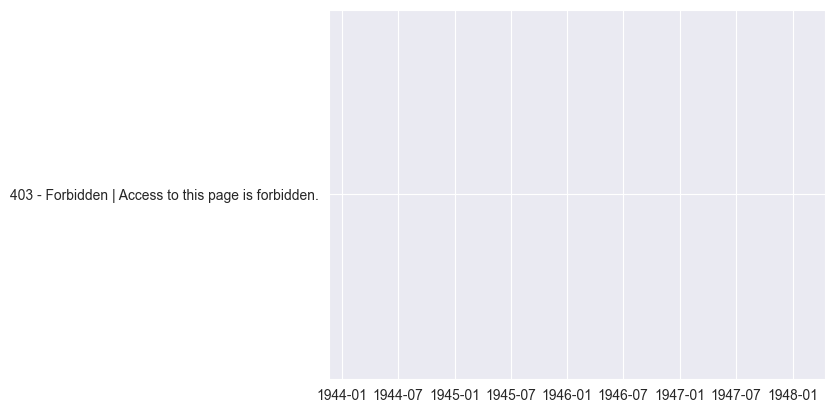

In [7]:
plt.plot(ds.birthcount);

- Observar el cambio en la `magnitud de las fluctuaciones` de manera visual, suele ser una tarea tediosa para ciertas series de tiempo. Por lo tanto, utilizaremos técnicas basadas en el cálculo del término ($s_{t}+\varepsilon_{t}$) o factor ($s_{t}\times\varepsilon_{t}$) y su respectiva visualización. Si la magnitud de las fluctuaciones obtenidas son similares entonces concluimos que la serie de tiempo es aditiva o multiplicativa según sea el caso. `Es un buen ejercicio para el estudiante calcular la magnitud de dichas fluctuaciones y visualizarlas`

In [8]:
figure_kwargs = {'figsize': (6, 6)}

In [9]:
# decomposed = arima.decompose(ds.birthcount.values, 'multiplicative', m=12)
# axes = utils.decomposed_plot(decomposed, figure_kwargs=figure_kwargs, show=False)
# axes[0].set_title("Seasonal Multiplicative Decomposition");

- Las diferentes funciones del código se utilizan como sigue:
    - La función `requests.get` del script anterior se utiliza para obtener los datos del url `DATA_URL`.
    - Para manejar el conjunto de datos, se utiliza un `DataFrame` de `pandas`.
    
- La función `seasonal_decompose` del módulo `stats models` se utiliza para `descomponer la señal de la serie temporal en componentes de tendencia, estacionalidad y residual`. La descomposición puede ser `aditiva o multiplicativa`. Un ejemplo de las diferentes componentes de una señal se muestra en el siguiente script

````{admonition} Observación
:class: tip

Normalmente, podemos identificar una serie temporal `aditiva`

$$y_{t}=f_{t}+s_{t}+\varepsilon_{t}$$

o `multiplicativa`

$$y_{t}=f_{t}\times s_{t}\times\varepsilon_{t}$$

a partir de su variación. `Si la magnitud del componente estacional cambia con el tiempo, la serie es multiplicativa`. En caso contrario, la serie es aditiva.

````

In [10]:
import datetime

In [11]:
dates_airpass = pd.date_range(start='1949-01', periods=len(datasets.load_airpassengers()), freq='M').strftime('%Y-%m')
air_pass_df = pd.DataFrame({'Date': dates_airpass.tolist(),
                            'Passengers': datasets.load_airpassengers().tolist()})
air_pass_df.head()

,Date,Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [12]:
beer_aust = pd.read_csv('datasets/quarterly-beer-production-in-aus-March 1956-June 1994.csv')
beer_aust.rename(columns={"Quarterly beer production in Australia: megalitres. March 1956 ? June 1994": "beer_prod"}, inplace=True)
beer_aust.head()

,Quarter,beer_prod
0,1956Q1,284.4
1,1956Q2,212.8
2,1956Q3,226.9
3,1956Q4,308.4
4,1957Q1,262.0


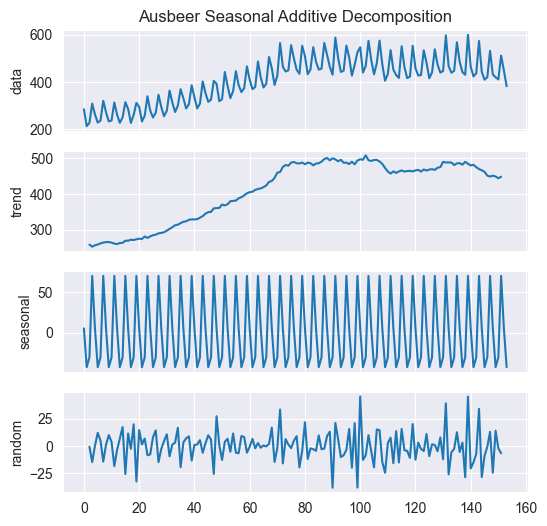

In [13]:
decomposed = arima.decompose(beer_aust.beer_prod, 'additive', m=4)
axes = utils.decomposed_plot(decomposed, figure_kwargs=figure_kwargs, show=False)
axes[0].set_title("Ausbeer Seasonal Additive Decomposition");

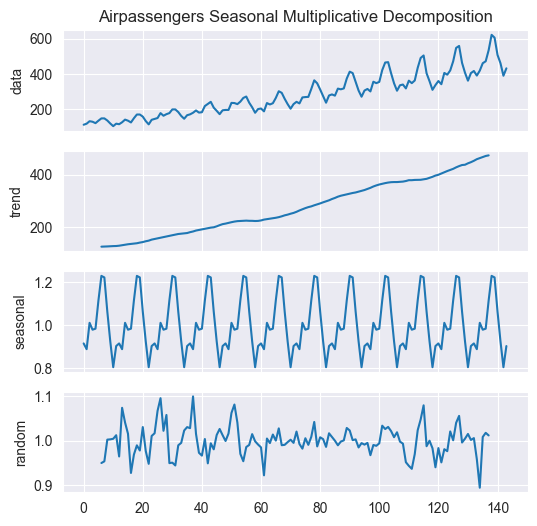

In [14]:
decomposed = arima.decompose(datasets.load_airpassengers(), 'multiplicative', m=12)
axes = utils.decomposed_plot(decomposed, figure_kwargs=figure_kwargs, show=False)
axes[0].set_title("Airpassengers Seasonal Multiplicative Decomposition");

- Las propiedades de estacionalidad aditiva y multiplicativa, se pueden estimar de manera experimental de la siguiente forma: `si la estacionalidad es aditiva, entonces el resultado de la resta entre la serie de tiempo origina y su media movil tendrá fluctuaciones casi similares en magnitud. Si es multiplicativa, entonces el resultado de la división tiene esta propiedad`. Veamos esto en el siguiente ejemplo

In [15]:
def movingaverage(interval, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return pd.DataFrame(np.convolve(interval, window, 'same'), columns=['MA'])

In [16]:
dates_airpassl = dates_airpass.tolist()

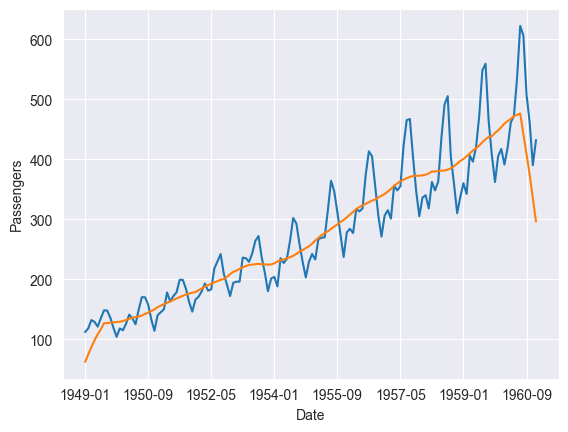

In [17]:
fig, ax = plt.subplots()
ax.plot(dates_airpassl, datasets.load_airpassengers())
ax.plot(dates_airpassl, movingaverage(datasets.load_airpassengers(), 12));
freq = int(20)
ax.set_xticks(dates_airpassl[::freq]);
ax.set_xticklabels(dates_airpassl[::freq]);
ax.set_xlabel('Date');
ax.set_ylabel('Passengers');

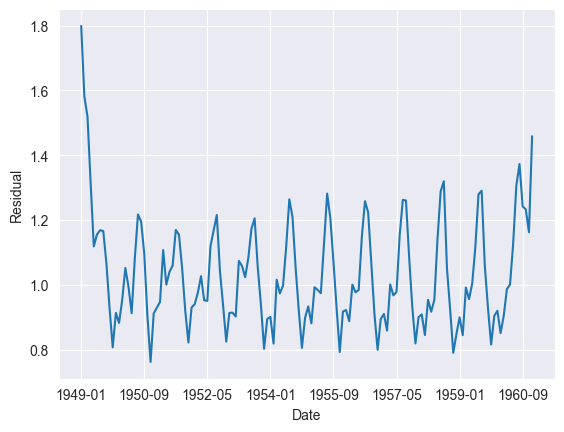

In [18]:
fig, ax = plt.subplots()
ax.plot(dates_airpassl, datasets.load_airpassengers()/movingaverage(datasets.load_airpassengers(), 12).MA.values);
freq = int(20)
ax.set_xticks(dates_airpassl[::freq]);
ax.set_xticklabels(dates_airpassl[::freq]);
ax.set_xlabel('Date');
ax.set_ylabel('Residual');

In [19]:
dates_beerpl = beer_aust.Quarter.tolist()

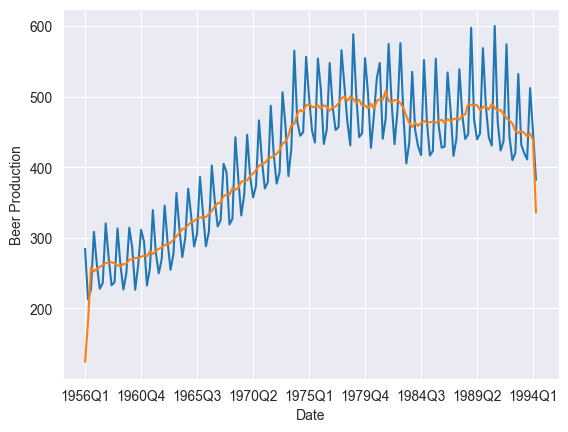

In [20]:
fig, ax = plt.subplots()
ax.plot(dates_beerpl, beer_aust.beer_prod)
ax.plot(movingaverage(beer_aust.beer_prod, 4));
freq = int(19)
ax.set_xticks(dates_beerpl[::freq]);
ax.set_xticklabels(dates_beerpl[::freq]);
ax.set_xlabel('Date');
ax.set_ylabel('Beer Production');

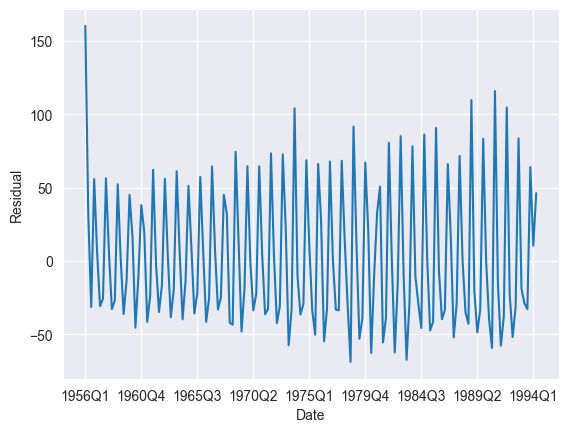

In [21]:
fig, ax = plt.subplots()
ax.plot(dates_beerpl, beer_aust.beer_prod-movingaverage(beer_aust.beer_prod, 4).MA.values);
freq = int(19)
ax.set_xticks(dates_beerpl[::freq]);
ax.set_xticklabels(dates_beerpl[::freq]);
ax.set_xlabel('Date');
ax.set_ylabel('Residual');

- Nótese que si calculamos el `residuo para una serie temporal con estacionalidad multiplicativa`, la serie resultante contiene componentes estacionales cuya `varianza aumenta cada periodo de frecuencia`.

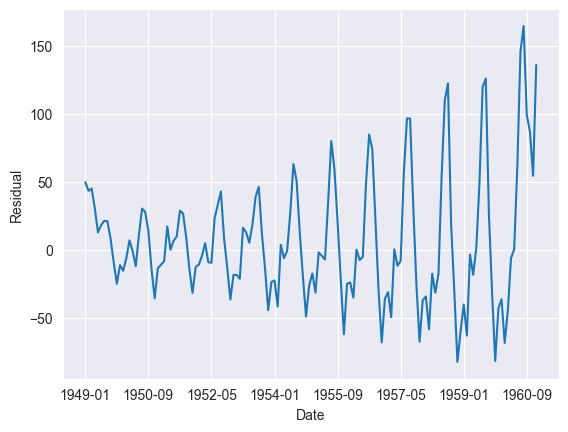

In [22]:
fig, ax = plt.subplots()
ax.plot(dates_airpassl, datasets.load_airpassengers()-movingaverage(datasets.load_airpassengers(), 12).MA.values);
freq = int(20)
ax.set_xticks(dates_airpassl[::freq]);
ax.set_xticklabels(dates_airpassl[::freq]);
ax.set_xlabel('Date');
ax.set_ylabel('Residual');

- Una alternativa para verificar estacionalidad sin usar visualziaciones, es utilizar una `prueba no paramétrica` (ver [Kruskal-Wallis test](https://jdemetradocumentation.github.io/JDemetra-documentation/pages/theory/Tests_KW.html)). Este test comprueba la `correlación entre la observación real y la observación retardada`. `Si las observaciones son independientes entre sí, siguen una distribución` $\chi^2$. `Cuando se rechaza esta hipótesis, se confirma una autocorrelación significativa, que es señal de movimientos estacionales en la serie`.

In [23]:
from scipy.stats import kruskal

def seasonality_test(series, period):
        seasonal = False
        idx = np.arange(len(series)) % period
        H_statistic, p_value = kruskal(series, idx)
        if p_value <= 0.05:
            seasonal = True
        return seasonal

In [24]:
print("Is the Air Passengers time series seasonal?:", seasonality_test(dates_airpassl, 12))

Is the Air Passengers time series seasonal?: True


In [25]:
print("Is the Beer production time series seasonal?:", seasonality_test(beer_aust.beer_prod, 4))

Is the Beer production time series seasonal?: True


- La señal de la serie temporal anterior está compuesta por la tendencia, la estacionalidad y el residuo (ruido blanco). `El suavizado ayuda a eliminar el componente residual y capta los componentes de tendencia y estacionalidad para la predicción de la señal`.

- `El primer paso del modelo para incluir la media, la tendencia y los patrones no estacionales es extrapolarla mediante la suavización`. La suavización básica mediante la media móvil se discutió en el capítulo anterior. El suavizado de media móvil evalúa las esperanzas $\textsf{E}(y_{t})$ utilizando todas las observaciones anteriores, como sigue:

$$\hat{y}_{t}=\frac{1}{N}\sum_{i=1}^{T}y_{t-i}$$

- Por lo general, `la media móvil simple se realiza sobre ventanas de predicción`; así, la predicción estimada se evalua en ventanas óptimas con el objetivo de minimizar la función de error

$$\min\left(\sum_{i=1}^{T}(y_{t}-\hat{y}_{t})^{2}\right)=\min\sum_{i=1}^{T}\left(y_{t}-\frac{1}{N}\sum_{i=1}^{T}y_{t-i}\right)^{2}$$

- Los métodos de suavización se basan en el `supuesto de que los datos de las series temporales son localmente estacionarios con pequeñas variaciones en la media`. Así, podemos utilizar la media en el momento $t$ para predecir en $t+1$ cuando el $\Delta t$ es lo suficientemente pequeño como para mantener la señal estacionaria. Este modelo es un compromiso entre la media y el modelo de paseo aleatorio sin desviación. 

- Los modelos también se denominan modelos de suavización, ya que `suavizan choques del conjunto de datos`. La principal limitación de estos métodos basados en la media móvil es que tratan todas las $n$ muestras utilizadas en el suavizado dando mayor peso a las observaciones recientes, como se muestra en la siguiente ecuación:

$$\hat{y}_{t}=\frac{1}{N}\sum_{i=1}^{T}w_{i}y_{t-i}.$$

- Aquí $w_{1}>w_{2}>\cdots>w_{T}$ y $T$ es la `longitud de la ventana`. Esto supone otro reto para la evaluación de las ponderaciones. La limitación de la media móvil y la media móvil ponderada se aborda mediante la `suavización exponencial aplicando ponderaciones con decaimiento exponencial en las observaciones`.

- Tomemos ahora como ejemplo el `precio de cierre de las acciones de IBM` para pronosticarlo utilizando el método de suavizado simple. El primer paso es cargar los módulos necesarios

In [26]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [27]:
ibm_df = pd.read_csv('datasets/ibm-common-stock-closing-prices.csv')
ibm_df.head()

,Date,IBM common stock closing prices
0,1962-01-02,572.00
1,1962-01-03,577.00
2,1962-01-04,571.25
3,1962-01-05,560.00
4,1962-01-08,549.50


- Por comodidad, cambiaremos el nombre de las columnas:

In [28]:
ibm_df.rename(columns={'IBM common stock closing prices': 'Close_Price'}, inplace=True)
ibm_df.head()

,Date,Close_Price
0,1962-01-02,572.00
1,1962-01-03,577.00
2,1962-01-04,571.25
3,1962-01-05,560.00
4,1962-01-08,549.50


- En el método de `suavización exponencial simple`, los valores predichos se generan como sigue usando Ec. {eq}`eq:simple_exp_smoothing3`. Esta serie se puede implementar en `Python` de la siguiente manera:

In [29]:
def single_exp_smoothing(x, alpha):
    F = [x[0]]
    for t in range(1, len(x)):
        F.append(alpha * x[t] + (1 - alpha) * F[t-1])
    return F

- La función `single_exp_smoothing` configurada con el valor inicial previsto se asigna como el primer valor de la serie. Evaluemos primero los casos extremos de previsión con $α = 0$ y $α = 1$

In [30]:
ibm_df['SES0'] = single_exp_smoothing(ibm_df['Close_Price'], 0)
ibm_df['SES1'] = single_exp_smoothing(ibm_df['Close_Price'], 1)

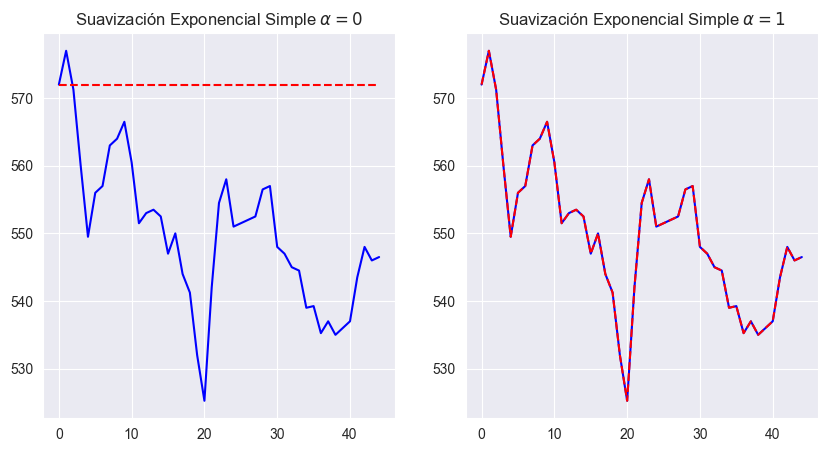

In [31]:
f, axarr = plt.subplots(1, 2, sharex=True)
f.set_size_inches(10, 5)


ibm_df['Close_Price'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[0])
ibm_df['SES0'].iloc[:45].plot(color='r', linestyle = '--', ax=axarr[0])
axarr[0].set_title(r'Suavización Exponencial Simple $\alpha=0$');

ibm_df['Close_Price'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[1])
ibm_df['SES1'].iloc[:45].plot(color='r', linestyle = '--', ax=axarr[1])
axarr[1].set_title(r'Suavización Exponencial Simple $\alpha=1$');

- La figura anterior ilustra que, para $\alpha=0$, la predicción es una constante, y para $\alpha=1$, la serie pronosticada se desplaza un desfase temporal. El pronóstico de alisamiento único para valores de suavización $0.2, 0.6, 0.8$ puede evaluarse como sigue

In [32]:
ibm_df['SES2'] = single_exp_smoothing(ibm_df['Close_Price'], 0.2)
ibm_df['SES6'] = single_exp_smoothing(ibm_df['Close_Price'], 0.6)
ibm_df['SES8'] = single_exp_smoothing(ibm_df['Close_Price'], 0.8)

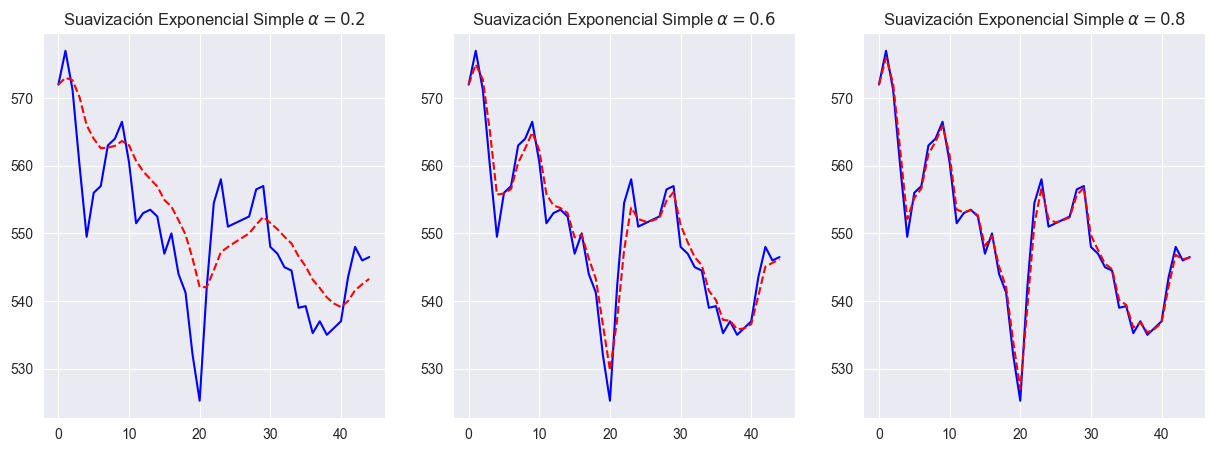

In [33]:
f, axarr = plt.subplots(1, 3, sharex=True)
f.set_size_inches(15, 5)

ibm_df['Close_Price'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[0])
ibm_df['SES2'].iloc[:45].plot(color='r', linestyle = '--', ax=axarr[0])
axarr[0].set_title(r'Suavización Exponencial Simple $\alpha=0.2$');

ibm_df['Close_Price'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[1])
ibm_df['SES6'].iloc[:45].plot(color='r', linestyle = '--', ax=axarr[1])
axarr[1].set_title(r'Suavización Exponencial Simple $\alpha=0.6$');

ibm_df['Close_Price'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[2])
ibm_df['SES8'].iloc[:45].plot(color='r', linestyle = '--', ax=axarr[2])
axarr[2].set_title(r'Suavización Exponencial Simple $\alpha=0.8$');

- La figura anterior ilustra que $\alpha$ tiene un gran impacto en la previsión; por lo tanto, obtener el valor correcto de $\alpha$ es fundamental a la hora de establecer la previsión

- La precisión del modelo puede evaluarse en una muestra retenida utilizando funciones objetivo estándar como el `error cuadrático medio (ECM)` o `el error absoluto medio (EAM)`

$$
\begin{align*}
\text{MSE}&=\frac{1}{N}\sum_{i=1}^{N}(y_{t}-\tilde{y}_{t})^{2}\\
\text{MAD}&=\frac{1}{N}\sum_{i=1}^{N}|y_{t}-\tilde{y}_{t}|
\end{align*}
$$

- Como el suavizado ayuda a reducir la varianza del conjunto de datos, reducirá la varianza de serie pronosticada entre cero y la varianza real del conjunto de datos

$$
\begin{align*}
\text{Var}(\tilde{y}_{T})&=\text{Var}\left(\alpha\sum_{i=0}^{\infty}(1-\alpha)^{i}y_{T-i}\right)\\
&=\frac{\alpha}{2-\alpha}\text{Var}(y_{T})
\end{align*}
$$

- Aquí, $T$ es la longitud de la serie temporal. Para una varianza unitaria de la serie $y_{T}$, la varianza captada por la serie pronosticada variará en función del parámetro de suavización α

## Suavización exponencial de segundo orden

- Si la suavización exponencial de primer orden no entrega la mejor bondad de ajuste, entonces `existe tendencia en los datos de la serie temporal`. La tendencia se observa habitualmente en muchos ámbitos, como cuando en las empresas de comercio electrónico o de marketing existe un `aumento de las ventas` o cuando cualquier `buen rendimiento anual de una empresa tendrá un efecto alcista en el precio de sus acciones`. La `tendencia lineal` puede ocurrir entre el tiempo y la respuesta:

    $$
    y_{t}=\omega_{0}+\omega_{1}t+\varepsilon_{t}
    $$
    donde, $\omega$ es el coeficiente que conduce a la tendencia. 

- El `suavizado exponencial de segundo orden` ayuda a `capturar la tendencia en los datos de serie temporal` incluyendo otro término en el suavizado exponencial de primer orden como sigue

$$
\begin{align*}
F_{t+1}&=\alpha y_{t}+(1-\alpha)(F_{t-1}+T_{t-1})\\
T_{t+1}&=\beta(F_{t}-F_{t-1})+(1-\beta)T_{t-1}
\end{align*}
$$

- Aquí $\alpha$ es el `factor de suavización` de los datos y $\beta$ es el `factor de suavización de la tendencia` con valores en el intervalo $[0, 1]$. La predicción en el tiempo posterior $t+1$ puede generarse como sigue

$$
\hat{y}_{t+1}=F_{t}+T_{t}
$$

- En la `suavización de segundo orden`, el `valor inicial del componente de tendencia` puede asignarse de múltiples maneras:

    $$
    \begin{align*}T_{1}&=y_{2}-y_{1}\\
    T_{1}&=(y_{n}-y_{1})/(n-1)
    \end{align*}
    $$
    donde, $n$ es el número de observaciones. 
    
- Estudiemos un ejemplo donde usemos `suavización de segundo orden`. Utilizaremos datos de `producción de cerveza` estudiados anteriormente

In [34]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [35]:
beer_df = pd.read_csv('datasets/quarterly-beer-production-in-aus-March 1956-June 1994.csv')
print('Dimensión del dataframe:', beer_df.shape)

beer_df.rename(columns={'Quarterly beer production in Australia: megalitres. March 1956 ? June 1994':'Beer_Prod'},
               inplace=True)
    
missing = (pd.isnull(beer_df['Quarter'])) | (pd.isnull(beer_df['Beer_Prod']))
print('Número de filas con al menos un valor igual a cero:', missing.sum())
beer_df = beer_df.loc[~missing, :]

print('Dimensiones después de eliminar los valores perdidos:', beer_df.shape)
beer_df.head()

Dimensión del dataframe: (154, 2)
Número de filas con al menos un valor igual a cero: 0
Dimensiones después de eliminar los valores perdidos: (154, 2)


,Quarter,Beer_Prod
0,1956Q1,284.4
1,1956Q2,212.8
2,1956Q3,226.9
3,1956Q4,308.4
4,1957Q1,262.0


- Creamos la función para el `suavizado exponencial doble`

In [36]:
def double_exp_smoothing(x, alpha, beta):
    yhat = [x[0]] # first value is same as series
    for t in range(1, len(x)):
        if t==1:
            F, T= x[0], x[1] - x[0]
        F_n_1, F = F, alpha*x[t] + (1-alpha)*(F+T)
        T=beta*(F-F_n_1)+(1-beta)*T
        yhat.append(F+T)
    return yhat

- La función anterior toma como entrada la serie temporal `x` con `alpha` y `beta`. La implementación anterior utiliza la `diferencia de las dos primeras ocurrencias para establecer el valor de la tendencia inicial`. Vamos a evaluar el rendimiento en los casos límite, es decir, `(alpha, beta)`$\in\{(0, 0), (0, 1), (1, 0), (1, 1)\}$.

In [37]:
beer_df['DEF00'] = double_exp_smoothing(beer_df['Beer_Prod'], 0, 0)
beer_df['DEF01'] = double_exp_smoothing(beer_df['Beer_Prod'], 0, 1)
beer_df['DEF10'] = double_exp_smoothing(beer_df['Beer_Prod'], 1, 0)
beer_df['DEF11'] = double_exp_smoothing(beer_df['Beer_Prod'], 1, 1)

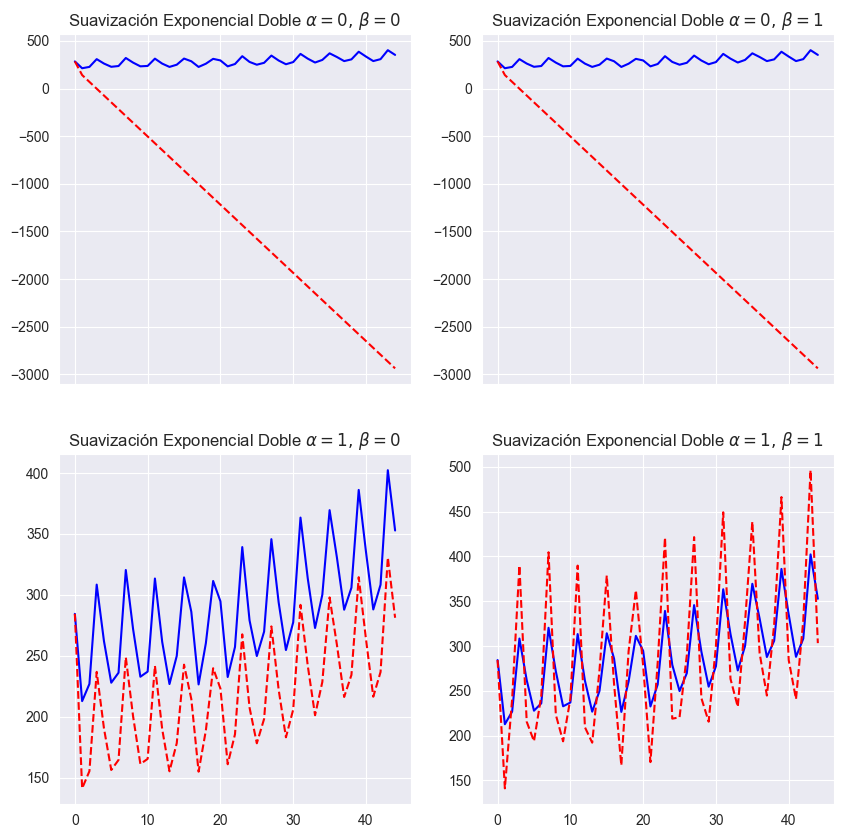

In [38]:
f, axarr = plt.subplots(2, 2, sharex=True)
f.set_size_inches(10, 10)

beer_df['Beer_Prod'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[0, 0])
beer_df['DEF00'].iloc[:45].plot(color='r', linestyle = '--', ax=axarr[0, 0])
axarr[0, 0].set_title(r'Suavización Exponencial Doble $\alpha=0,\,\beta=0$')

beer_df['Beer_Prod'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[0, 1])
beer_df['DEF01'].iloc[:45].plot(color='r', linestyle = '--', ax=axarr[0, 1])
axarr[0, 1].set_title(r'Suavización Exponencial Doble $\alpha=0,\,\beta=1$')

beer_df['Beer_Prod'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[1, 0])
beer_df['DEF10'].iloc[:45].plot(color='r', linestyle = '--', ax=axarr[1, 0])
axarr[1, 0].set_title(r'Suavización Exponencial Doble $\alpha=1,\,\beta=0$');

beer_df['Beer_Prod'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[1, 1])
beer_df['DEF11'].iloc[:45].plot(color='r', linestyle = '--', ax=axarr[1, 1])
axarr[1, 1].set_title(r'Suavización Exponencial Doble $\alpha=1,\,\beta=1$');

- Cuando `alpha=0`, los `valores iniciales permanecen constantes`; por lo tanto, `el parámetro de tendencia no desempeña ningún papel`. Sin embargo, cuando `alpha = 1 y beta = 0`, la `suavización exponencial de segundo orden` puede escribirse de la siguiente manera

$$
\begin{align*}
F_{t}&=y_{t-1}\\
T_{t}&=T_{t-1}\\
\hat{y}_{t}&=y_{t-1}+T_{t-1}
\end{align*}
$$

- `La predicción en el tiempo` $t$ `depende del valor anterior y de los componentes de tendencia`. Como `beta se fija en cero`, el componente de tendencia en $t-1$ dependerá de $t-2$, el de $t-2$ de $t-3$ y así sucesivamente

$$
T_{t}=T_{t-1}=T_{t-2}=T_{t-3}=\cdots=T_{0}
$$

- Así, `el valor del componente de tendencia depende del valor inicial asignado y es una constante`. Del mismo modo, para `alpha = 1 y beta = 1`, la `suavización exponencial de segundo orden` puede simplificarse como sigue

$$
\begin{align*}
F_{t}&=y_{t-1}\\
T_{t}&=(F_{t-1}-F_{t-2})=y_{t-2}-y_{t-3}\\
\hat{y}_{t}&=y_{t-1}+(y_{t-2}-y_{t-3})
\end{align*}
$$

- Con `alpha = 1 y beta = 1`, la diferencia de las observaciones en los tiempos $t-2$ y $t-3$ se añaden al valor de predicción en el tiempo $t$ en comparación con la configuración de `alpha = 1 y beta = 0`, que da el desplazamiento a la predicción y `se acerca más a la previsión real`

- Realizamos a continuación un `suavizado exponencial doble` con los datos de producción de cerveza `utilizando valores intermedios de alpha y beta` de la siguiente manera

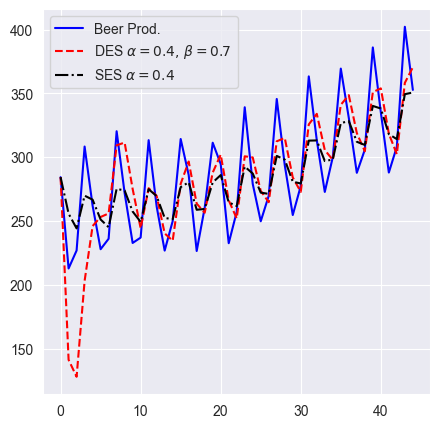

In [39]:
beer_df['DEF'] = double_exp_smoothing(beer_df['Beer_Prod'], 0.4, 0.7)
beer_df['Single_Exponential_Forecast'] = single_exp_smoothing(beer_df['Beer_Prod'], 0.4)

fig, ax = plt.subplots()
fig.set_size_inches(5, 5)
beer_df['Beer_Prod'].iloc[:45].plot(color='b', linestyle = '-', label = 'Beer Prod.')
beer_df['DEF'].iloc[:45].plot(color='r', linestyle = '--', label = r'DES $\alpha=0.4,\,\beta=0.7$')
beer_df['Single_Exponential_Forecast'].iloc[:45].plot(color='k', linestyle = '-.', label = r'SES $\alpha=0.4$')
leg = ax.legend();

- La figura anterior muestra que `el suavizado exponencial doble es capaz de capturar mejor la variación de la señal real para el conjunto de datos actual en comparación con el suavizado exponencial simple`. Sin embargo, en los escenarios en los que el componente de tendencia tienden a cero, el rendimiento del suavizado exponencial simple y doble es comparable.

## Suavización exponencial de orden superior

- El concepto puede extenderse a la `suavización exponencial de orden superior` con un modelo polinómico de $n^{\text{th}}$ orden

$$
y_{t}=\alpha_{0}+\alpha_{1}t+\frac{\alpha_{2}}{2!}t^{2}+\cdots+\frac{\alpha_{n}}{n!}t^{n}+\varepsilon_{t}
$$

- Aquí, el error $\varepsilon_{t}\sim N(0,\sigma^{2})$ se distribuye normalmente con media $0$ y varianza $\sigma^{2}$. Los suavizadores exponenciales utilizados para el orden superior son los siguientes

$$
\begin{align*}
\tilde{x}_{t}^{(1)}&=k y_{t}+(1-k)\tilde{x}_{t-1}^{(1)}\\
\tilde{x}_{t}^{(2)}&=k \tilde{x}_{t}^{(1)}+(1-k)\tilde{x}_{t-1}^{(2)}\\
&\vdots\\
\tilde{x}_{t}^{(n)}&=k \tilde{x}_{t}^{(n-1)}+(1-k)\tilde{x}_{t-1}^{(n)}
\end{align*}
$$

- En este caso, se trata de pesos para los suavizadores. `Normalmente, la suavización exponencial de orden superior no se utiliza, el cálculo es muy difícil`, mas bien, se utilizan modelos `Autorregrsivos Integrados de Media Movil(ARIMA)` los cuales se tratarán con más detalle en la siguiente sección.

- Otro suavizado exponencial muy popular es el `suavizado exponencial triple  (Holt Winters)`. El `suavizado exponencial triple` permite capturar la `estacionalidad con el nivel (valor suavizado de la parte constante en el tiempo) y la tendencia`. La relación entre: `niveles, tendencias y la estacionalidad` se define mediante el siguiente conjunto de ecuaciones

$$
\begin{align*}
F_{t}&=\alpha(y_{t}-S_{t-L})+(1-\alpha)(F_{t-1}+T_{t-1})
\end{align*}
$$

- En estas ecuaciones, $F_{t}$ `capta los niveles de observación ` en el momento $t$. Asimismo, $T_{t}$ y $S_{t}$ capturan `tendencia y estacionalidad` en el tiempo $t$. Los coeficientes $\alpha, \beta$ `representan: factor de suavización de los datos, factor de suavización de la tendencia y factor de suavización de la estacionalidad`, respectivamente con valores en el intervalo $[0,1]$. Estas ecuaciones pueden utilizarse para pronosticar el siguiente período de tiempo de la siguiente manera

$$
\begin{align*}
T_{t}&=\beta(F_{t}-F_{t-1})+(1-\beta)T_{t-1}\\
S_{t}&=\gamma(y_{t}-F_{t})+(1-\gamma)S_{t-C}
\end{align*}
$$

- El término $F_{t}$ `recoge el desfase de los componentes estacionales con respecto a la última tendencia estacional observada`. Usemos `suavización exponencial triple para los datos de empleo de Wisconsin`

In [40]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

Shape of the DataFrame: (178, 2)


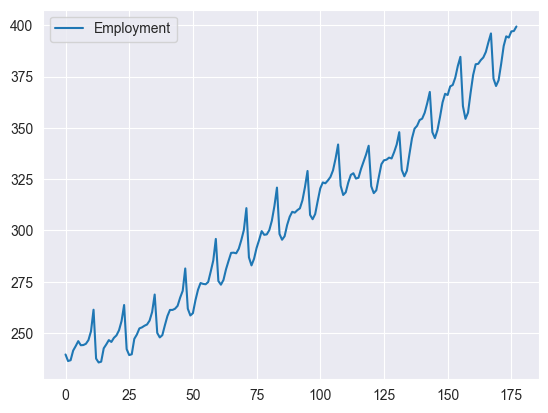

In [41]:
wisc_emp = pd.read_csv('datasets/wisconsin-employment-time-series.csv')
print('Shape of the DataFrame:', wisc_emp.shape)
wisc_emp.head();
wisc_emp.plot();

- La figura anterior muestra el conjunto de datos de series temporales, `Employment` de `Wisconsin`. El conjunto de datos consta de `tendencia anual y estacionalidad mensual`. Dado que el patrón de estacionalidad de los datos es conocido, la información sobre la estacionalidad puede utilizarse para `derivar el valor inicial de la tendencia como el valor medio de las estaciones` utilizando la siguiente ecuación

$$
T_{0}=\frac{1}{C}\left(\frac{y_{C+1}-y_{1}}{C}+\frac{y_{C+2}-y_{2}}{C}+\frac{y_{C+3}-y_{3}}{C}+\cdots\right)
$$

- La ecuación anterior puede implementarse en `Python` como sigue:

In [42]:
def initialize_T(x, seasonLength):
    total=0.0
    for i in range(seasonLength):
        total+=float(x[i+seasonLength]-x[i])/seasonLength
    return total

- Por ejemplo, el valor de `tendencia inicial` generado por la función anterior es $1.69$ utilizando el script `initialize_T()`

In [43]:
initialize_T(wisc_emp['Employment'], 12)

1.6916666666666653

- La `estacionalidad inicial` es de suma importancia y se puede calcular con la siguiente función. Los valores iniciales de las estaciones se calculan como valor medio de la respuesta $x$

In [44]:
def initialize_seasonalilty(x, seasonLength):
    seasons={}
    seasonsMean=[]
    num_season=int(len(x)/seasonLength)

    for i in range(num_season):
        seasonsMean.append(sum(x[seasonLength*i:seasonLength*i+seasonLength])/float(seasonLength))
    
    for i in range(seasonLength):
        tot=0.0
        for j in range(num_season):
            tot+=x[seasonLength*j+i]-seasonsMean[j]
        seasons[i]=tot/num_season
    return seasons

In [45]:
initialize_seasonalilty(wisc_emp['Employment'], 12)   

{0: -11.325000000000015,
 1: -14.48214285714287,
 2: -12.667857142857159,
 3: -6.403571428571445,
 4: -1.603571428571444,
 5: 1.5535714285714164,
 6: 1.0821428571428413,
 7: 2.22499999999998,
 8: 3.539285714285705,
 9: 6.89642857142856,
 10: 11.774999999999986,
 11: 19.410714285714267}

- Una vez obtenidos los valores, estamos listos para establecer la predicción utilizando `suavización exponencial triple`

In [46]:
def triple_exp_smoothing(x, seasonLength, alpha, beta, gamma, h):
    yhat=[]
    S = initialize_seasonalilty(x, seasonLength)
    for i in range(len(x)+h):
        if i == 0:
            F = x[0]
            T = initialize_T(x, seasonLength)
            yhat.append(x[0])
            continue
        if i >= len(x):
            m = i - len(x) + 1
            yhat.append((F + m*T) + S[i%seasonLength])
        else:
            obsval = x[i]
            F_last, F= F, alpha*(obsval-S[i%seasonLength]) + (1-alpha)*(F+T)
            T = beta * (F-F_last) + (1-beta)*T
            S[i%seasonLength] = gamma*(obsval-F) + (1-gamma)*S[i%seasonLength]
            yhat.append(F+T+S[i%seasonLength])
    return yhat

- La `suavización exponencial triple` está controlada por `alpha, beta y gamma`. La presencia o ausencia de cualquier escenario tendrá un efecto drástico en el resultado. Hagamos una comparación empírica para diferentes escenarios extremos. Vamos a `ejecutar el suavizado exponencial con parámetros intermedios`, como se muestra en la siguiente figura

In [47]:
wisc_emp['TES']=triple_exp_smoothing(wisc_emp['Employment'], 12, 0.4, 0.6, 0.2, 0)

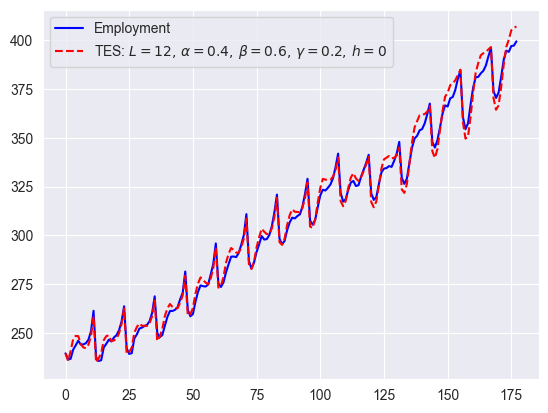

In [48]:
fig = plt.figure()
ax = fig.add_subplot()

wisc_emp['Employment'].plot(ax=ax, color='b', linestyle = '-', label = 'Employment')
wisc_emp['TES'].plot(ax=ax, color='r', linestyle = '--', 
                     label = r'TES: $L=12,\,\alpha=0.4,\,\beta=0.6,\,\gamma=0.2,\,h=0$')
leg = ax.legend();

- Si comparamos este ajuste con las `suavizaciones de primer y segundo orden obtenemos`

In [49]:
wisc_emp['DES'] = double_exp_smoothing(wisc_emp['Employment'], 0.4, 0.6)
wisc_emp['SES'] = single_exp_smoothing(wisc_emp['Employment'], 0.4)

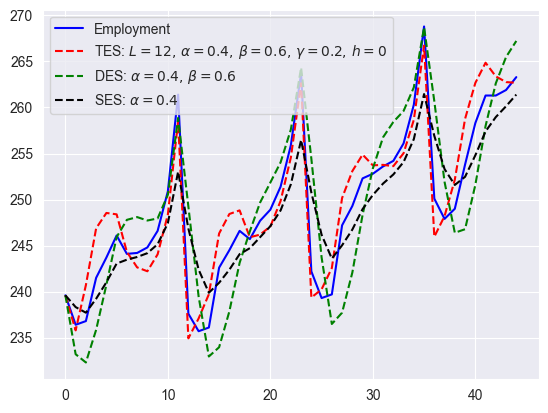

In [50]:
fig = plt.figure()
ax = fig.add_subplot()

wisc_emp['Employment'].iloc[:45].plot(ax=ax, color='b', linestyle = '-', label = 'Employment')
wisc_emp['TES'].iloc[:45].plot(ax=ax, color='r', linestyle = '--', 
                     label = r'TES: $L=12,\,\alpha=0.4,\,\beta=0.6,\,\gamma=0.2,\,h=0$')
wisc_emp['DES'].iloc[:45].plot(ax=ax, color='g', linestyle = '--', label = r'DES: $\alpha=0.4,\,\beta=0.6$')
wisc_emp['SES'].iloc[:45].plot(ax=ax, color='k', linestyle = '--', label = r'SES: $\alpha=0.4$')
leg = ax.legend();

- Según los estudios numéricos, el nivel único que utiliza el suavizado o la estacionalidad es capaz de capturar tendencia en los datos; por tanto, todos los modelos funcionaron bien, ya que `el suavizado exponencial simple y el doble fueron capaces de utilizar el factor de suavización para hacer las predicciones` y la `suavización exponencial triple es capaz de capturas las predicciones utilizando los factores de suavización o estacionalidad`.

````{admonition} Resumen
:class: tip

- Este capítulo trata de los enfoques de suavización exponencial para datos de series temporales. Los enfoques pueden ampliarse fácilmente para la predicción mediante la inclusión de términos como el `factor de suavización, factor de tendencia y factor de estacionalidad`. 

- El suavizado exponencial de orden único realiza la suavización utilizando solo el factor $\lambda$, que se amplía con los factores $\alpha,\,\beta$ de segundo orden al incluir tendencia. `La suavización de tercer orden incorpora todos los factores, tendencia y estacionalidad en el modelo`.

- En este capítulo se han tratado todos estos modelos en detalle con su implementación en `Python`. El enfoque de `suavizado exponencial puede utilizarse para pronosticar series temporales estacionarias`. Sin embargo, esta suposición puede no ser cierta. `Se recomienda el suavizado exponencial de orden superior para estos casos`, pero su cálculo es difícil y costoso computacionalmente. Por lo tanto, para hacer frente a este planteamiento, `se utilizan otras técnicas de previsión como el modelo ARIMA, que se tratará en la siguiente sección`.

````